# Buying wins in NBA Basketball
##### by Nurul Zaman [noor]
![](images/title.png)


# Table-of-contents
[Introduction](#Introduction)
<br>
[Data cleanup and aggregation](#data_collection)
<br>
[Part 1: Analyzing wins against team salaries](#part1)
<br>
[Part 2: Analyzing wins against team super star composition](#part2)
<br>
[Part 3: Machine Learning](#ml)
<br>
[Part 4: Bootstrapping](#bootstrapping)
<br>
[Conclusions](#conclusions)
<br>
[Appendix A: Scripts](#scripts)



# Introduction
![](images/section_line.png)

NBA Basketball is big business in United States with most of the NBA teams worth in billions of dollars. The teams spend an enormous amount of money and effort in acquiring players from the colleges through the draft, signing them from other teams or recruiting them from other countries. There are scouts who scour the globe in search of talent and there are data analysts who track each imaginable metric related to basketball. The owners are deep pocketed, some more than the others. Additionally, bigger markets such as Los Angeles or New York generate more revenue and have more to offer to attract the players. To keep some kind of check so that the richest owners and biggest markets do not monopolize the league, salary caps have been instituted. These caps make sure that organizations spending over the cap are financially heavily penalized. However, teams regularly go above the cap to get the top talent in the market. 

Money, therefore, plays an important role in keeping or acquiring the players. It is therefore logical to believe that all things being equal, more money spend on hiring the best players would ultimately result in more wins - or so I thought. Now, player metrics such as field goal percentages, win shares and more have been studied in detail and models have been created that do a good prediction of the results. However, the goals of this project are to analyze the teams and team structure in terms of ***finances only*** and figure out the following:
<hr>
<font color=blue>
- Does total money spend on a team translate to more wins ?


- Does financial composition of the team play a role in more wins ? For example, does a team that pays top dollars for the top 3 stars win more games than the team paying top dollars for the top 2 stars ?


- Can we predict if the teams will qualify for playoffs based on money it spends on salaries ?
</font>
<hr>

To achieve these goals we will go through the following process:

-	**Collecting and cleaning up the data:** Data for wins, losses and salary cap is readily available. Individual salary data is not that easy to get but possible through some web scraping scripts. These scripts are included at the end.


-	**Relationship analysis for team salaries vs. wins:** After collecting and cleaning up the data from online sources, we will aggregate and explore the data to check to see if there are obvious relationships. This will be primarily done by using scatter plots to see if a relationship exists. This will cover both the league wide analysis as well as conference based analysis. The NBA league is divided into Eastern and Western conferences. We will explain the differences as needed. 


-	**ANOVA for financial team composition vs. Wins:** Does a team win more if it adds more stars? Are 2 stars better than one? Does a strong (most paid) bench play any part in winning? We will compare the team wins with different team compositions in financial terms. For 1-star we will take the salary of the best paid player of each team and compare the wins. For 2-star We will next take the aggregated salaries of top 2 paid players and compare the wins and so on. We will use ANOVA to confirm if there are any differences to suggest if any specific team composition leads to more wins.


-	**Machine Learning Techniques for predicting playoffs:** NBA playoffs consist of the top 8 teams from each conference making the playoffs. This means that 16 teams land in the playoffs. In general, if teams win more than half their games, they will be in the playoffs. Through various machine learning techniques, such as logistic regression and neural network, we will try to see if the amount of money spend on teams and players have any effect on predicting if the teams would end up in playoffs. 

- **Bootstrapping for validation:** Bootstrapping technique allows us to analyze cases that do not follow any readily available distributions. We will use bootstrap to validate our earlier work and provide confidence intervals.


[Back to TOC](#Table-of-contents)
<a id='data_collection'></a>
# Data Collection, Cleanup and Exploration
![](images/section_line.png)

### Data Collection
For the purpose of this project we needed to collect the following data: 

- **Salary cap information: ** This is the salary cap for all the years. The salary cap is same for all teams. Teams that spend more money and go over the cap have to pay a huge financial penalty. This penalty gets steeper for repeat offenders. The salary cap data is a small set of data and and  is hardcoded as a dictionary.
<br><br>
- **Win loss record for all teams during the target period: ** The win loss records are also freely available from the web. We choose to only work with the wins. The basketball season is 82 games so we can always subtract the wins from the total to get the losses. In one shortened season, 2011, the teams only played 66 games. However, the wins for that season have been normalized to match the 82 games season. The players were still paid for the whole season so we do not need to normalize the salaries.
<br><br>
- **Individual salary information for all players for all teams: ** This is the dataset for salary of each player in the league for all teams for targeted years. This is scraped from a basketball stats website, www.basketball-reference.com, and kept in a csv file. This took quite a lot of effort and I had to develop some python scripts for it. These scripts are also included with this report. Once the data is downloaded, it is kept in identifiable files locally. The file names indicate the team and year. On all subsequent calls, this cache of files is first checked and data is loaded locally. If the file has not been donwloaded, it is downloaded and read. If something changes, we can always use the force option to force the script to load the files again from the internet. 
<br>

The raw data described above is accessed from different part of the notebook as follows:
<br>
- **get_sals_df()** returns the individual salaries for players through the target years.
<br>
- **get_win_loss_df()** returns the win loss records for all teams for the target years
<br>
- **get_salary_cap_df()** returns the salary cap information for all years. 

Samples for these raw data are reproduced below:


In [8]:
get_salary_cap_df().head() # display the salary cap info

,year,cap
0,2005,63318000
1,2006,64455000
2,2007,65475000
3,2008,64612000
4,2009,63948000


In [9]:
get_sals_df().head() # display individual salary for each player

,name,salary,year,team_id
0,Dikembe Mutombo,14400000.0,2001,ATL
1,Alan Henderson,5910000.0,2001,ATL
2,Lorenzen Wright,4950000.0,2001,ATL
3,Jim Jackson,2330000.0,2001,ATL
4,Chris Crawford,2200000.0,2001,ATL


In [10]:
get_win_loss_df().head() # display win loss record for each team

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
team_id,,,,,,,,,,,,,,,,
ATL,33,35,28,13,26,30,37,47,53,44,50,44,38,60,48,43
BOS,49,44,36,45,33,24,66,62,50,56,48,41,25,40,48,53
BRK,52,49,47,42,49,41,34,34,12,24,27,49,44,38,21,20
CHI,21,30,23,47,41,49,33,41,41,62,62,45,48,50,42,41
CHO,32,32,32,18,26,33,32,35,44,34,9,21,43,33,48,36


[Back to TOC](#Table-of-contents)
<a id='data-cleanup'></a>
### Data cleanup and aggregation  

We now have the raw data that will be used for subsequent exploration. However, before doing that we would need to aggregate and normalize the data to be useful. 

- **Normalized 2011 win loss data:** 2011 was an exceptional year due to a shortened season becuase of a lockout. Instead of 82 games, each team played 66 games. The shortened year did not have any effect on player salaries so we just multiply the win totals for each time by 82/66 to arrive at a normalized total.


- **Normalized salary data:** In most explorations, we are considering the trends within a single year so the value of dollar does not play a role. However, when we start doing machine learning, we will use all the data for all years. To normalize the dollar value we will divide the salary for each player with the salary cap for that year. That will effectively normalize all salary data for all years. 


- **Aggregated team salary data:** For team wide exploration, we will just aggregate the data over salary information. This will get us 360 rows of data for total team salaries (30 team salaries multiplied by the number of years 12).  


- **Aggregated top stars salary data:** We also wanted to find out if the team composition had any effect on wins. We will aggregate the data and find out the salary of highest paid star, aggregate salaries of highest paid top 2 stars, aggregate salaries of highest paid top 3 stars on a team and so on. We have data for 11 individual players for all years so our data set will be 30 teams * 12 years * 11 players. 

Samples of these aggregations follow:

** Aggregated team salaries data **

In [11]:
get_agg_salary_df(get_sals_df()).iloc[-5:]

team_id,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
year,,,,,,,,,,,,,,,,,,,,,
2012,73669912.0,79820530.0,65281235.0,69548447.0,57902024.0,64875599.0,74463409.0,58553173.0,70923605.0,61576901.0,...,59501709.0,86962825.0,66672368.0,80640576.0,79568536.0,48950236.0,73732762.0,55063049.0,56948761.0,55386345.0
2013,66768365.0,73021989.0,84290205.0,75627699.0,57491899.0,68428583.0,67399169.0,68566062.0,63057497.0,69695346.0,...,67863244.0,87114818.0,84032270.0,60844774.0,73656857.0,54317436.0,69787704.0,66974563.0,64717649.0,66343388.0
2014,55131673.0,63769609.0,102608995.0,85095835.0,60819062.0,47050404.0,67486257.0,67324401.0,59157073.0,66764126.0,...,71181364.0,58318374.0,58945006.0,64412586.0,61539586.0,78765372.0,63666028.0,53076014.0,54491476.0,64064905.0
2015,58337671.0,61092622.0,91873492.0,81244225.0,75954458.0,82038768.0,83970065.0,56278056.0,66738182.0,73623654.0,...,78791632.0,53338463.0,56455990.0,66503432.0,92220907.0,73675912.0,69614583.0,75562364.0,59061387.0,83108421.0
2016,71453126.0,77202316.0,83831503.0,85385898.0,77609865.0,105962520.0,74040317.0,72606354.0,76638790.0,93707197.0,...,94622660.0,63349656.0,63646397.0,69701209.0,61000674.0,71840771.0,87365099.0,71934665.0,64783884.0,84237317.0


[Back to TOC](#Table-of-contents)
<a id='part1'></a>
# Part 1: Analyzing wins against team salaries
![](images/section_line.png)

We will analyze the data to test our assumption that larger salaries paid to the teams will  result in more wins. The league itself is divided into two conferences: Eastern and Western. The teams play more games within the same coference and fewer games against teams in the other conference. Eight teams from each conference reach the playoffs. Because of this reason conferences are sometimes unbalanced. For example, currently Western conference is much stronger than its Eastern counterpart.  To compete against these stronger teams, the Western teams may spend more money and win less games than their Eastern counterpart. 

So, we will analyze the wins vs. team salaries considering the whole league as well as analyzing it within separate conferences. We can see the trend line from the plots. For added confidence, we are also printing out the pearson coefficient for each plot which gives the linear relationship between two datasets. 

##### League team salaries vs. wins
The league wide comparison is for salary vs. wins for the 30 teams in NBA.  This comparison is repeated for all years between 2005 to 2016. The relationship is not very strong in most years. The smallest is 0.03 and the max is 0.5. In fact, in some years, we see a negative relationship showing that more money spent results in less wins !! This runs contrary to established wisdom but data is data.


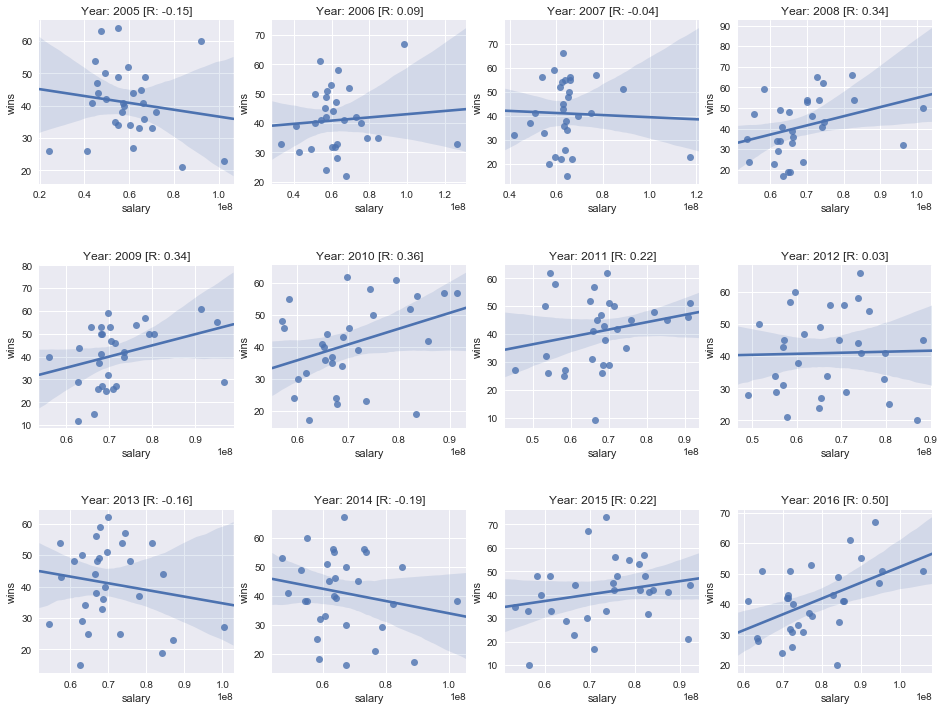

In [23]:
res = plot_team_salary_vs_wins(get_team_ids())

##### Eastern Conference  team salaries vs. wins
The plots for Eastern Conference do not fare much better than the league average. In fact most of them are even worse than the league. It seems like that the Eastern conference spends a lot of money without any wins to show for it.

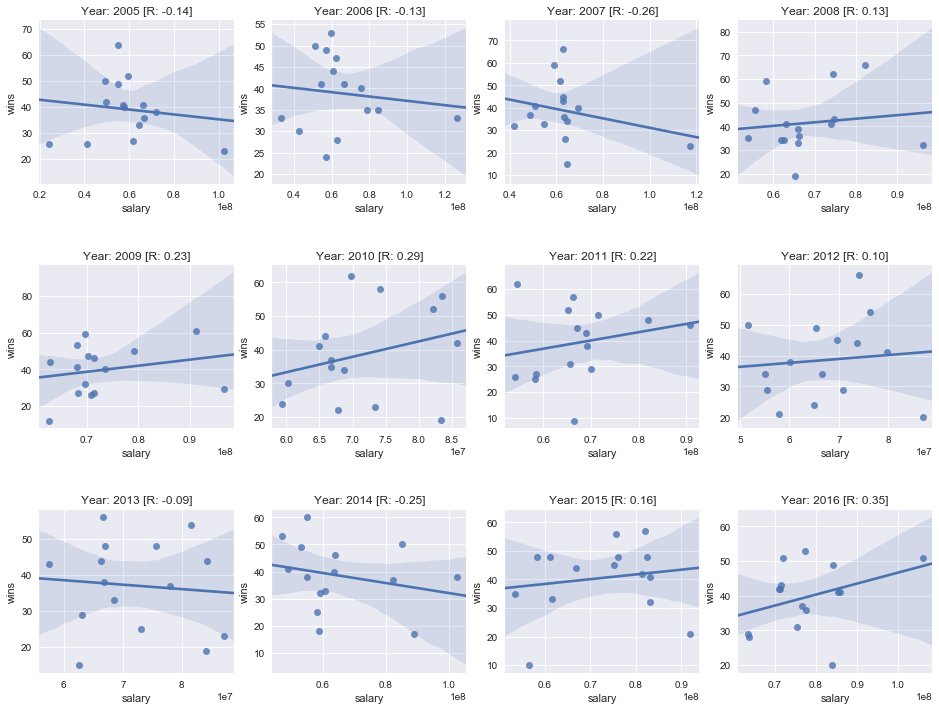

In [15]:
res = plot_team_salary_vs_wins(get_team_ids_east())

##### Western Conference team salaries vs. wins
Western conference is slightly better than the Eastern with more wins to show for the money spend. However, the trend is still unclear as it sways from high positive to moderate negative.

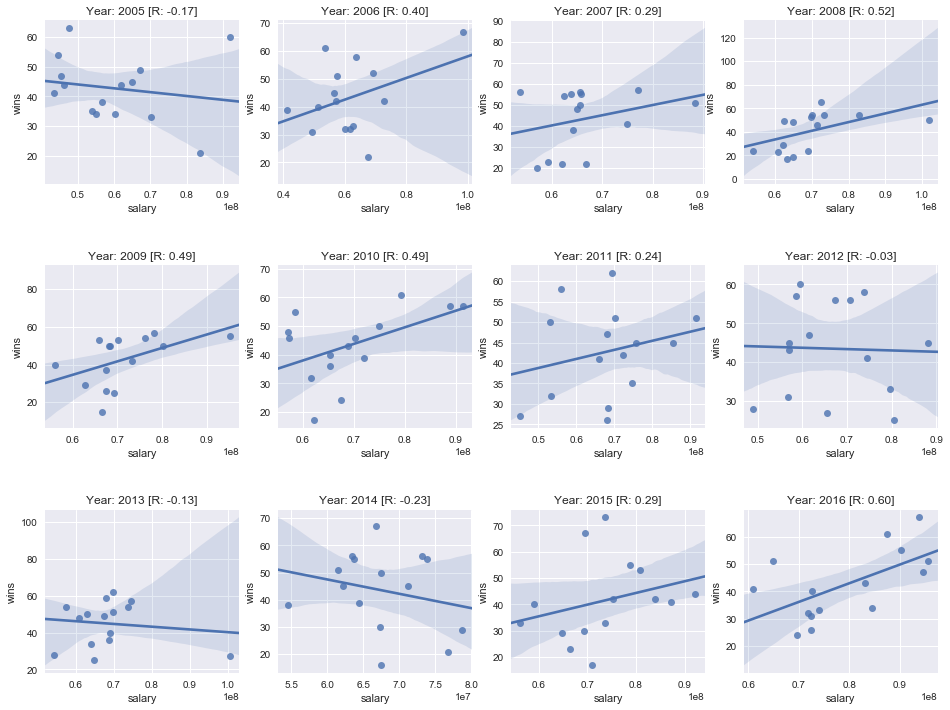

In [16]:
res = plot_team_salary_vs_wins(get_team_ids_west())

##### Trend over the years 
The plots for the league as well as the conferences show that there is some kind of cyclic trend. The regression line sometimes follows an upward or downward trend across multiple years. It seems that every few years something happens that throws off the league in such a way that money spend does not result in wins. Over the next few years, this is corrected and teams spending more money start winning more - until the next downturn hits. We will come back to this phenomenon after a little bit more analysis and plausible explanations.

Following are summarized tables and plots that show this cyclical trend more clearly.

In [17]:
get_salary_vs_wins_corrs().T

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
League,-0.15,0.09,-0.04,0.34,0.34,0.36,0.22,0.03,-0.16,-0.19,0.22,0.50
East,-0.14,-0.13,-0.26,0.13,0.23,0.29,0.22,0.10,-0.09,-0.25,0.16,0.35
West,-0.17,0.40,0.29,0.52,0.49,0.49,0.24,-0.03,-0.13,-0.23,0.29,0.60


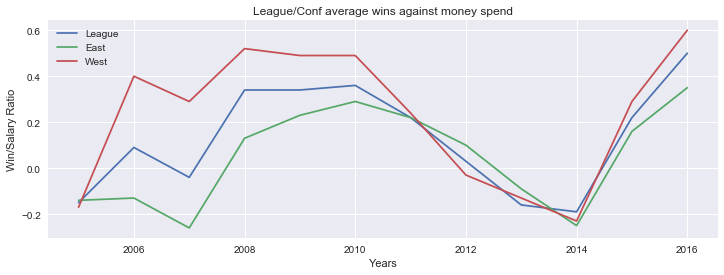

In [25]:
plot_salary_vs_wins_corrs()

##### Normalizing Salary Across Years
To take another look at the data across the years, we normalized all the salaries to 2017 dollar levels. This was done by creating a multiplication factor for each year by dividing the 2017 salary cap by that years salary cap and then using that factor to multiply each salary. For example:

    **Atlanta Hawks (ATL)**
    Total team salary in 2005: 41,059,616 (~41 million dollars)
    2005 salary cap: 63318000
    2017 salary cap: 101000000
    Multiplication factor: 2017 salary cap / 2005 salary cap = 101000000/63318000 = 1.595
    2005 salary in 2017 dollars = 65,495,140 (~65 million dollars)

In [19]:
get_all_normalized_salaries().head()

,year,team_id,salary,salary_2017,wins
0,2005,ATL,41059616.0,6.549514e+07,26
1,2005,BOS,64577356.0,1.030088e+08,33
2,2005,BRK,54983980.0,8.770621e+07,49
3,2005,CHI,57276129.0,9.136247e+07,41
4,2005,CHO,23922578.0,3.815946e+07,26


##### Trends in normalized salaries across years
Looking at the salary and win distributions and comparison across the normalized data, we see some trends:
- salary is nearly normally distributed across all years.
- wins are also normally distributed
- there is a slight positive trend for wins against total dollars spend on the team

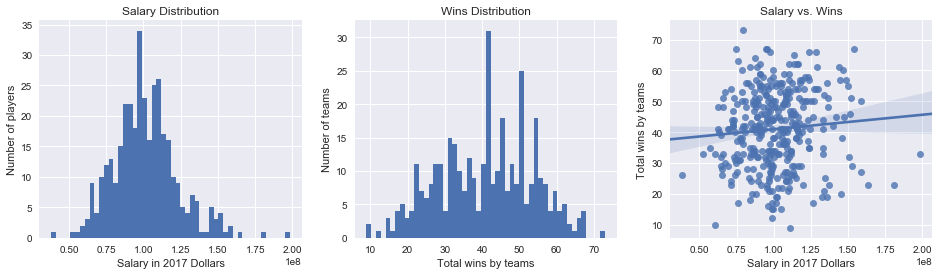

In [20]:
plot_salary_and_wins_relationship(get_all_normalized_salaries())

##### Yearly trend for normalized salary data
We have already seen these charts themselves separately for league and conference comparisons. To see all the trends within one plot, we needed to normalize the salaries across years. With that done, we can look at the kaleidoscopic view (generated by Searborn). The trends are mixed with salary/wins relationship following a different pattern nearly each year. 


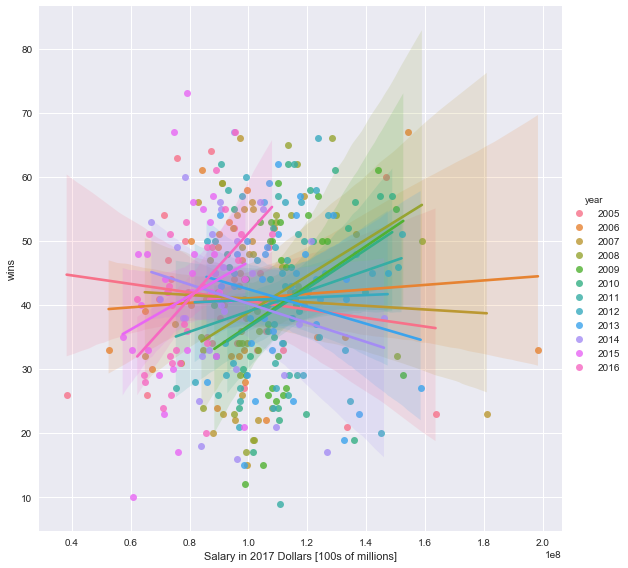

In [21]:
plot_normalized_salaries_vs_wins(get_all_normalized_salaries())

### Part 1 Summary and plausible explanations 

After looking at the charts, we do not see any overarching relationships for money well spent. The relationship between money vs. wins swings from -0.25 to 0.50 and all values in between. However, over the longer term we do see some trends. Some of the most obvious trends may have the following plausible explanations: 


** Trends seem to follow last year (mostly) **

There seems to be some kind of inertia involved in the trends. If the wins vs. salary is going down in some year, then it keep doing that over the next year and then it tries to correct itself towards the positive direction. This may be due to some big events happening that roils the league. Our theory (or conjecture if you may) is that every few year some player appears on the scene or moves to another team disrupting all teams across the league. 


**2010 - 2014** 

At the beginning of 2010, the regression coefficient was at 0.5. From 2010-2014, it continuously went downward for both Eastern and Western conferences. This coincides with Lebron James joining the Heat to create a super team with Dwayne Wade and Chris Bosh. It seems that teams started reshaping theselves and threw money around to create their own super teams, to little effect. 


**Money Spend by the Two Conferences**

The wins vs. money swings are more obvious in the Western Conference. In the last couple of decades, East has consistently been the weaker conference. West had the prenniel super power San Antonio. To contend with San Antonio, teams like Lakers, Clippers, Rockets, Thunder, Grizzlies all have build powerful teams. Now with the rise of Heat, they again had to change their model with mixed results.



** 2014 - 2016 The Have and Have-Nots **

LeBron left the Heat in 2014 to go back to Cavaliers. By that time, the rest of the teams seem to have finally aligned themselves to counter the super team phenomena. The teams divided themselves into Have and Have Nots. The small market teams could not compete with the money spend so they chose the route of "Tanking" to speedily get to the bottom of the barrel. This allowed them for a high draft pick on rookie contracts.


Admittedly, the above arguments are not really a scientific proof but they are the most plausible explanations.  There are smart organizations and there are bad ones. There are some huge stars whose movement is just cataclysmic for the league. It disturbs the equilibrium and the whole process of re-creating competent teams starts anew.


[Back to TOC](#Table-of-contents)
<a id='part2'></a>
# Part 2: Analyzing wins against team super star composition
![](images/section_line.png)

Over the years, super stars have ruled the NBA. In an effort to draw in the crowds and make the games entertaining, rules have been tweaked so that a super star can have an outsized effect on the game. When the stars switch team, the whole league may be shook up. In this section we will focus on 1, 2, or more stars on a team and their effect in terms of the wins compared to what they are paid.


Super stars are great players but they are ultimately humans. Teams can counter a single super star by crowding him or beating them by adding two stars on their own team. Similarly a team with 3 stars would be able to beat a team with 2 stars. Obviously, this is too simplistic an assumption and there are other dynamics such as teamwork, coaching and a multitude of other factors that play into the equation. However, we will limit ourselves to finances only and try to find if we can determine just by salaries if the composition of the team affects the wins. We will use S1 for team with top 1 star, S2 for team with 2 top stars and so on..


** 1 star effect (S1): ** We will take the top salary earner from each team and plot it against his win shares. This will be done for all 30 teams.

** 2 stars effect (S2): ** We will take the top two combined salary from each team and plot it against the win shares.

and so on...

The following plots show the effect of top 1, 2, 3, and 4 top paid teams against the wins. In many cases, the team that pays the most to the top star also has the highest payroll for the top 2 stars. However, after breaking the bank for the top 1 or 2 stars and because of salary cap restrictions, little is left to pay the other players. Similarly, the money spent changes over the years for different teams. When nearer to the top, teams try to break the bank in the hope of a chamionship. Teams near the bottom try to spend lesser in the hope of getting a good pick in the lottery.


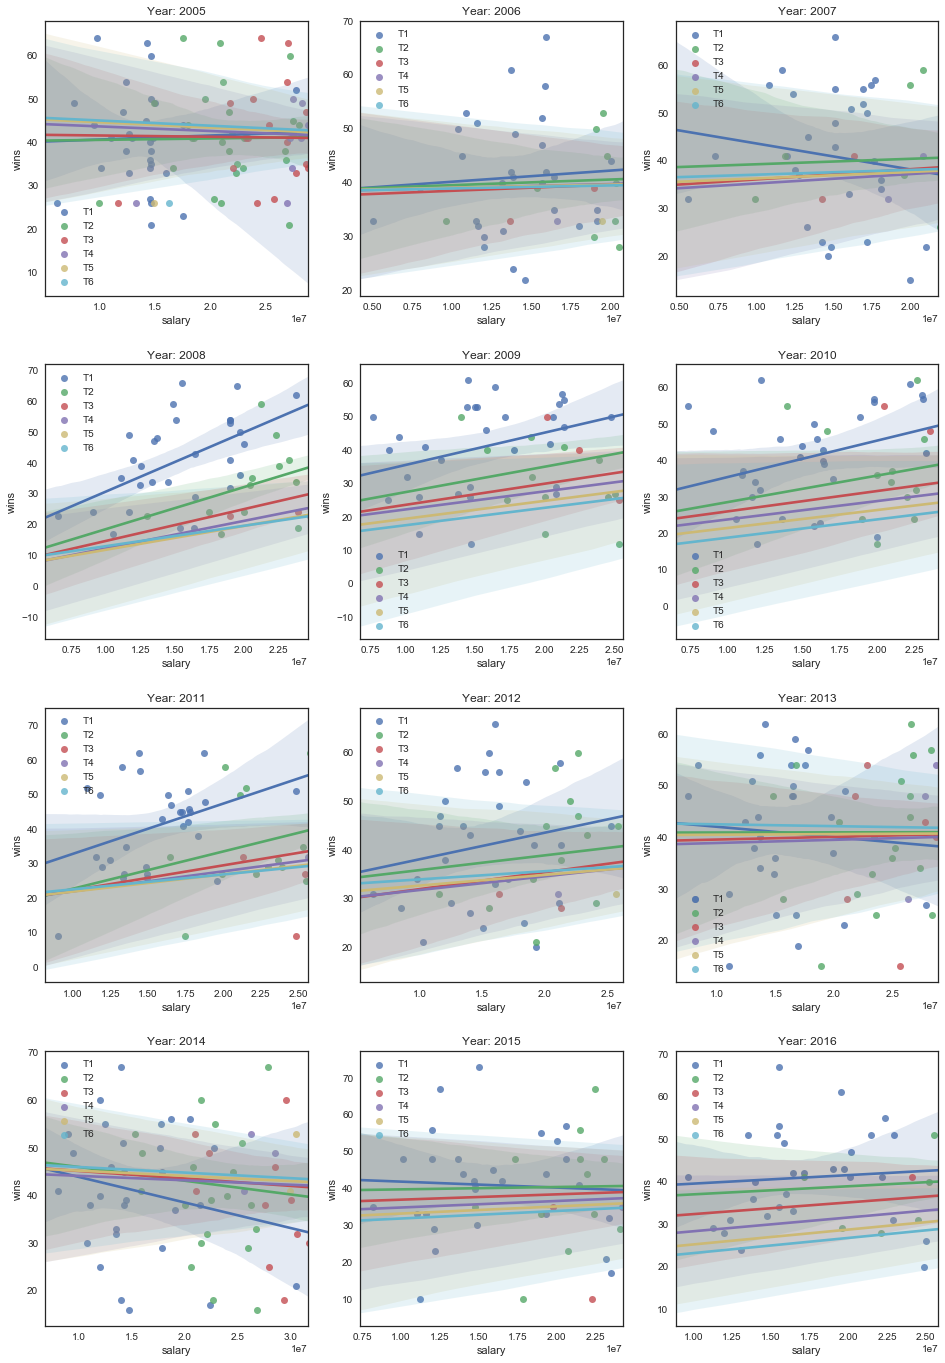

In [97]:
plot_wins_for_teams_with_highest_paid_players()

##### Trends from team composition

The above plots show some interesting trends. The most highly paid star seems to drive the destiny of the team one way of the other.
- from years 2008-2012 the most highly paid star seemded to rule the league in terms of wins. It seemed like the team with the highest paid player won the most.
- the fortune of the lone wolf took a dive in 2013 with the fall from grace the most obvious in 2014. The situation corrected itself in 2015 and 2016 but the glory years of 2008-12 seem to be gone.

The same situation can also be viewed by the summary table for the team composition as shown below. In the table we are showing an even greater number of team composition win shares, from T1 up to T11 (we only showed T1-T6 otherwise it would overwhelm the plots).

In [172]:
summary_table_stars()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11
2005,0.031,0.018,-0.020,-0.085,-0.109,-0.119,-0.129,-0.133,-0.139,-0.144,-0.146
2006,0.063,0.054,0.084,0.063,0.059,0.061,0.066,0.073,0.074,0.079,0.079
2007,-0.133,0.044,0.112,0.116,0.086,0.067,0.038,0.004,-0.013,-0.032,-0.040
2008,0.531,0.594,0.617,0.593,0.545,0.496,0.472,0.470,0.463,0.448,0.434
2009,0.336,0.420,0.433,0.395,0.397,0.391,0.393,0.384,0.374,0.376,0.368
2010,0.327,0.382,0.389,0.386,0.388,0.402,0.400,0.406,0.407,0.398,0.389
2011,0.367,0.471,0.439,0.409,0.383,0.355,0.331,0.312,0.290,0.275,0.264
2012,0.182,0.167,0.255,0.235,0.192,0.151,0.118,0.105,0.088,0.068,0.048
2013,-0.065,0.002,0.041,0.051,0.011,-0.031,-0.066,-0.076,-0.095,-0.115,-0.138
2014,-0.193,-0.179,-0.124,-0.082,-0.102,-0.111,-0.118,-0.132,-0.148,-0.160,-0.168


*** Correlation between team composition ***

In the following plot we draw the correlations between the team compositions. It is no surprise that there is a high degree of correlation between team composition. Some of them are basically straight lines especially in the late compositions. For example, T4 is nearly completely aligned with T6. We are not showing the relationships between all 11 compositions but they basically follow the same path.

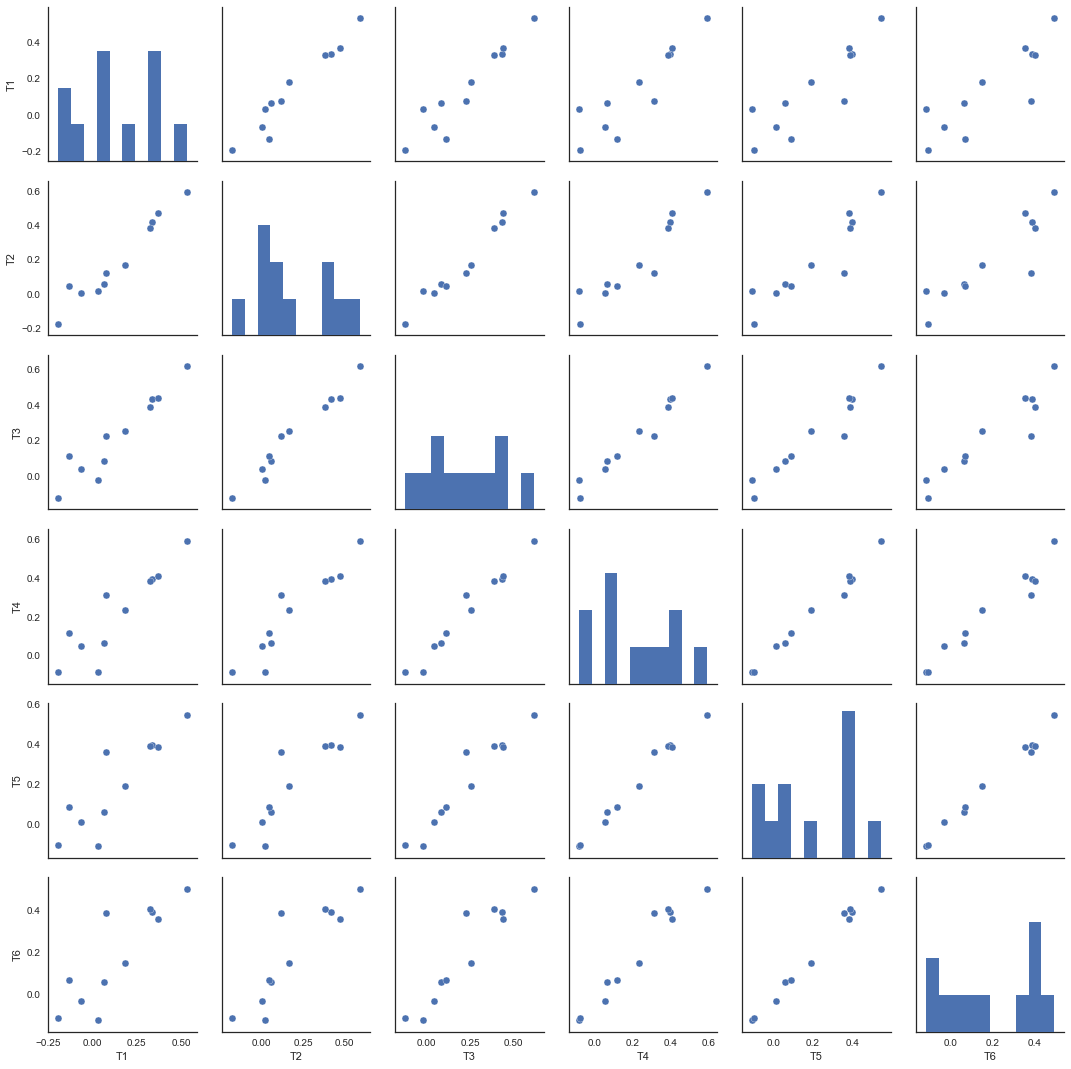

In [179]:
plot_team_composition_relationships()

*** Looking at the big picture ***

Finally, we can also see the big picture for the different team compositions throught time. When reading this plot, we should be careful that we are looking at the whole league as a whole. We are not tracking the same team over years. For example, Toronto Raptors may have had the highest paid player in one year but the next year it may be some other team with the highest paid player.

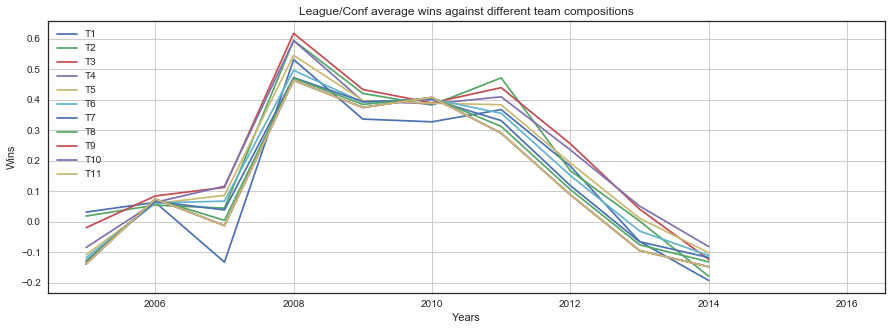

In [173]:
summary_plots_stars()

### Summary  
The yearly plots and summarized chart do show that ther are some differences between different team compositions. It may be possible that 3 highest paid stars is the optimum number to get the most wins. However, it is hard to tell that from the charts. We will use analysis of variance to find out if there is anything different between different team compositions and if so, which one. 


### ANOVA for team composition

We have seen that the team composition for highest paid players track pretty closely. Looking at the plots and tables, it is hard to say if a team with the highest paid player wins more or less games than a balanced team with 8 players making up the highest pay in the league. We can test that using ANOVA against the team composition. We already have a table that represents the team composition in terms of win shares, so we can compare hthe means using ANOVA to find out if the means are similar or differ.


$ H_0: μ_{T1} = μ_{T2} = μ_{T3}  = μ_{T4}  = μ_{T5}  = μ_{T6}... $

$ H_a: At \hspace{1mm} least \hspace{1mm} one  \hspace{1mm} μ \hspace{1mm} is \hspace{1mm} different $


The result of ANOVA is 

$$F-statistic: 0.171$$
$$Probability: 0.998$$

Such a large probability tells us that there is no difference between the mean win shares with teams with different compositions and the differences are only a result of the random nature.

In [232]:
df = pd.DataFrame(get_star_corrs())[[2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016]].T
df = pd.DataFrame(df, columns = get_top_player_symbols())
res = stats.f_oneway(df['T1'],df['T2'],df['T3'],df['T4'],df['T5']
            ,df['T6'],df['T7'],df['T8'],df['T9'],df['T10'],df['T11'])

print ('F-Statistic: ', res[0])
print ('Probability: ', res[1])

F-Statistic:  0.170998310531
Probability:  0.997881424713


##### Boxplot to confirm ANOVA
The probability value from ANOVA is very large. That may be explained by the following boxplot which shows that the means are overlapping across the board. 

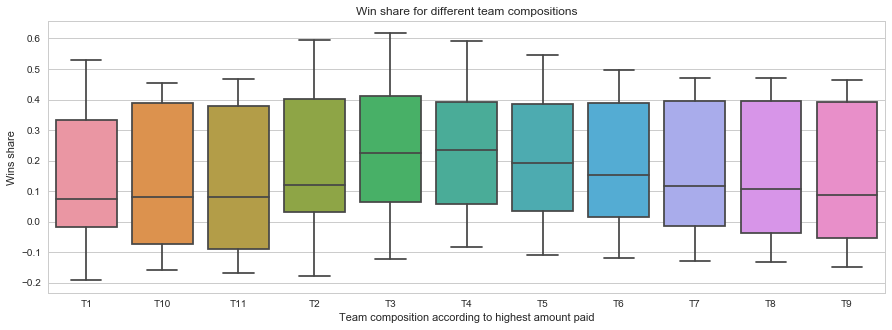

In [224]:
show_boxplots_for_multiple_team_composition()

### Part 2 Summary and plausible explanations 

In this section we tried to find if there is a difference with teams winning if they hire one or more players by paying them the most amount of money in the league. We categorized the teams as having one highest paid player, an aggregate of 2 highest paid player and so on. Then we used different visualizations and an ANOVA test to figure out the differences. 

- The scatter plots and trend lines for different years showed that there is some sort of association between wins and the composition of the team
- Teams with the highest paid player in the league displayed different types of trends in different years. In some years, such as 2008, teams paying a single player the most got most wins. However, that was not the case with most years.
- Years 2007 and 2014 showed a negative trend. Teams lost more as they paid more to their highest paid player. There are a lot of bad contracts thrown around in NBA but these years kind of stood apart.


[Back to TOC](#Table-of-contents)
<a id='ml'></a>
# Part 3: Machine Learning (ML)
![](images/section_line.png)
![](images/let_the_machine_do_it.png)
Uptil now, we have explored the data at a higher level to see if we can see some obvious patterns in the data. There are some trends that we can see - for example it seems that number of wins start increasing for the total money spend on teams. However, we see that the trend keeps fluctuating over time. For some years, it seems to have a positive trend, for some years negative and for some years nearly flatlining. We will now move on to use some powerful  machine learning techniqust that can help figure out hidden trends in the data. We will start with trying multiple ML techniques such as logistical regression, neural network, boosted tree and support vector machine to see if we can get some predictions about which team can make the playoffs. Out of these techniques, we will pick the one that seems to be the best applicable to our problem. 

### Data preparation for prediction

For machine learning, we will operate on salary data for 11 players in each of the 30 teams over a period of 12 years. Normally there are 15 players in a team rotation. However, anyone beyond the second team (top 8) gets a minimum amount of salary (relatively speaking) and it is hard to get these salaries from any online source. So we will limit ourselves to 11 players with the confidence that this should be enough for our analysis. We would have 360 rows of data: 

- **12 years / 30 teams  / 11 players = 360 rows with 11 columns**

We will also add the salary cap data for that year and a flag to indicate whether the team made the playoffs for that particular year. The reason for salary cap data is explained in the normalization section. With these additional columns, our dataset for prediction now looks as below:

In [60]:
create_prediction_df(normed = False).head() #real dollar values (for comparison)

,year,team_id,conf,playoffs,wins,salary_cap,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
0,2005,ATL,Eastern,0,26,63318000,14625000.0,6325000.0,3250000.0,2700000.0,2550000.0,2490360.0,1800000.0,1500000.0,1300000.0,1270080.0,1100000.0
1,2005,BRK,Eastern,1,49,63318000,14989285.0,14796000.0,12584688.0,2266794.0,1887864.0,1600000.0,1053720.0,1000000.0,939480.0,932546.0,900000.0
2,2005,BOS,Eastern,0,33,63318000,12584688.0,9714538.0,5455200.0,5408700.0,5333333.0,4903000.0,4800000.0,4800000.0,2700000.0,1611840.0,1419240.0
3,2005,CHO,Eastern,1,26,63318000,6166466.0,3739680.0,1742400.0,1652453.0,1554326.0,1400000.0,1174200.0,1100000.0,932546.0,825000.0,695046.0
4,2005,CHI,Eastern,0,41,63318000,12925000.0,5408700.0,5055556.0,4801102.0,3896402.0,3358320.0,3150000.0,2750000.0,2525000.0,2349840.0,2273400.0


** Normalizing the data **

Before we submit the data to machine learning algorithms, we need to normalize the data so that the values across different teams and different time periods make sense. For example, the salaries paid in 2016 will be considerably higher than the ones paid in 2005 in absolute dollar terms. We will use the "salary cap" as an equalizer. The cap is created for each year and is incremented every year. The salary paid to the players can be cast in terms of percentage for that year's salary cap. So the players may earn considerably more in terms of dollars but the percentage of salary earned should remain the same over years:

- *** player salary percent = salary / salary_cap for that year ***

*** Please note that the normed values will not always add up to 1 since teams can spend more or less than the salary cap which we are using to normalize player salaries ***

With the salary cap induced normalization, our dataset still has the same fields as defined below:

- year: year for the analysis
- team_id: a three digit identifier for each team
- conf: conference the team belongs to "Eastern" or "Western"
- playoffs: playoffs is the binary factor to indicate if a team made it to the playoffs or not.
- P1: top paid player on a team for that year
- P2: second top paid player for a team 
- P3 .. P11: thrid top paid player and so on..


In [61]:
create_prediction_df(normed = True).head() #normalized salaries across years

,year,team_id,conf,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,playoffs
0,2005,ATL,Eastern,0.231,0.100,0.051,0.043,0.040,0.039,0.028,0.024,0.021,0.020,0.017,0
1,2005,BRK,Eastern,0.237,0.234,0.199,0.036,0.030,0.025,0.017,0.016,0.015,0.015,0.014,1
2,2005,BOS,Eastern,0.199,0.153,0.086,0.085,0.084,0.077,0.076,0.076,0.043,0.025,0.022,0
3,2005,CHO,Eastern,0.097,0.059,0.028,0.026,0.025,0.022,0.019,0.017,0.015,0.013,0.011,1
4,2005,CHI,Eastern,0.204,0.085,0.080,0.076,0.062,0.053,0.050,0.043,0.040,0.037,0.036,0


** Summary of the prediction data **

Following table and plot shows the summary statistics about the data for running the  predictions. The players on each team are listed as "P1", "P2".. in terms of decreasing salaries. P1 is the salary of the top paid player for each team in a particular year. P2 is the salary of the 2nd best paid player for each team in a particular year and so on. From the box plot, we can see that the distribution looks normal but there are some stars that are paid much more than the others. This trend is applicable to the top stars down to the last one. This would mean that most teams pay market rate to players but some teams are willing to pay more to bolster their rosters. This trend is also visible if we look at the summary table.

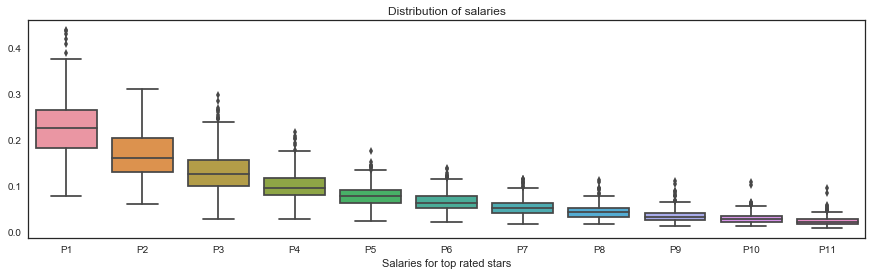

In [32]:
show_salary_distribution()

In [68]:
create_prediction_df(normed = True).describe().iloc[1:,1:12].round()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
mean,0.225,0.167,0.131,0.100,0.078,0.064,0.053,0.042,0.034,0.028,0.023
std,0.065,0.052,0.046,0.032,0.023,0.021,0.018,0.016,0.014,0.012,0.010
min,0.078,0.059,0.028,0.026,0.022,0.020,0.016,0.015,0.010,0.010,0.007
25%,0.181,0.129,0.098,0.079,0.063,0.050,0.040,0.031,0.024,0.020,0.016
50%,0.224,0.159,0.124,0.094,0.076,0.061,0.050,0.041,0.032,0.026,0.020
75%,0.263,0.203,0.155,0.117,0.091,0.076,0.062,0.050,0.040,0.034,0.027
max,0.437,0.309,0.297,0.216,0.175,0.138,0.115,0.111,0.110,0.107,0.093


### Azure ML Experiments
We use Azure Machine Learning studio to conduct the classification experiments. The purpose of these experiments is to find out if the normalized player salaries can be used to predict if the team makes it to the playoffs. The experiments basically consist of:

- Loading data: Loading the supplied data in an Azure table format. This is simply done by loading the .csv file.
- Cleaning data: Changing column names, dropping columns. In this case, there was no need to do that.
- Splitting data: The splitting module splits the data into a defined percentage to be used for training and testing purposes. 
- Configuring algorithm: Azure provides drop down menus for configuration values. In most cases, we can just select the dafult. 
- Train model: This module uses the training data set to create the model. 
- Score model: This module uses the test data set to score the model previously created by the training module. 
- Evaluate model: Validates the model by presenting several statistics such as Accuracy, AUC and more to show how the model performed

We already have our prediction data cleaned up, normalized and ready for use. So it was easy to  write out the .csv file and then load it into Azure. We then ran the following experiments:

- **Logistic Regression Parameters:**

    - Create trainer mode: Single Parameter
    - Optimization tolerance: 1E-07
    - L1 regularization weight: 1
    - L2 regularization weight: 1
    - Memory size for L-BFGS: 20
    - Random number seed: 1234
    - Allow unknown categorical levels: Checked


- **Neural Network Parameters:** 

    - Create trainer mode: Parameter Range
    - Hidden layer specification: Fully-connected case
    - Number of hidden nodes: 100
    - Learning rate: 0.01, 0.02, 0.04
    - Use Range Builder: Unchecked
    - Number of iterations: 20, 40, 80, 160
    - Use Range Builder: Unchecked
    - The initial learning weights diameter: 0.01
    - The momentum: 0.01
    - The type of normalizer: Do not normalize
    - Shuffle examples: Checked
    - Random number seed: 1234
    - Allow unknown category: Checked


- **Boosted Tree Parameters:**

    - Create trainer mode: Parameter Range
    - Maximum number of leaves per tree: 2, 8, 32, 128
    - Use Range Builder: Unchecked 
    - Minimum number of samples per leaf node: 1, 10, 50
    - Use Range Builder: Unchecked 
    - Learning rate: 0.025, 0.05, 0.1, 0.2, 0.4
    - Use Range Builder: Unchecked 
    - Number of trees constructed: 20, 100, 500
    - Use Range Builder: Unchecked  
    - Random number seed: 1234


- **Support Vector Machine Parameters:**

    - Create trainer mode: Parameter Range
    - Number of iterations: 1, 10, 100
    - Use Range Builder: : Unchecked
    - Lambda: 0.00001, 0.0001, 0.001, 0.01, 0.1
    - Use Range Builder: : Unchecked
    - Normalize features: Unchecked
    - Project to the unit-sphere: Unchecked
    - Random number seed: 1234
    - Allow unknown categorical levels: Checked

#### Azure ML Run No. 1 (Initial probe)
![](images/experiments.png)

![](images/experiments_res1.png)

### Interpretation of first ML run 
The results of all the machine learning techniques are not very encouraging. The accuracy of the best one is 0.576 which is as good as random guessing. This accuracy is across the board with all the techniques. Of all the techniques, logistic regression, which is probably the easiest to understand provides the best result. We will use the logistic regression for further analysis.

Following is a table describing the feature weights assigned to various variables for the logistic regression.  Useless as it may seem, we can still glean some information from it:


|team ids    	|feature wt.  	|player |feature wt.  	|
|---	        |---	        |---	|---	        |
|team_id_ATL   	|0.677652   	|P1   	|-0.0165762     |
|team_id_BRK   	|-0.277229   	|P2    	|0.0114173      |
|team_id_CHI   	|0.653194   	|P4    	|-0.00952294   	|
|team_id_CHO   	|-0.0240512   	|P4    	|-0.0125567   	|
|team_id_DAL   	|0.53417   	    |P4    	|-0.0927288   	|
|team_id_DEN   	|0.201864   	|P5    	|-0.00866936   	|
|team_id_MIN   	|-1.24512   	|P8    	|0.297258   	|
|team_id_NYK   	|-0.0217422   	|P8    	|0.28889   	    |
|team_id_OKC   	|-0.288558   	|P10   	|-0.0115495     |
|team_id_PHI   	|-0.431389   	|P11   	|-0.0165952   	|
|team_id_SAS   	|0.934665   	|P11   	|-0.0116828   	|
|team_id_SAC   	|-0.712768   	|   	|   	        |
|team_id_TOR   	|-0.460099   	|   	|   	        |


- **8th highest paid player is the most important (!):** The feature weights go from a low of -0.017 for P1 to a high of +0.6 for P8. This is in effect telling us that a player who is being paied the 8th highest amount of money has more effect than the top paid player !! We can say that team rotations mostly consist of 8 players so a team with deep enough pockets to pay player number 8 higher than the competitors has a better chance of winning but it does seem kind of confounding.


- **Teams/Management play a role:** The model tries to put emphasis on team_ids. For example it assigns a weight of 0.93 to San Antonio Spurs (SAS). This is not surprising since SAS has been a model organization for decades since Greg Popovich took over as General Manager/Coach. But it also assigns a positive coefficient of 0.65 to Chicago Bulls which is not necessarily a well run organization. We can argue that a good team gets more bang for the buck and the model somehow figures out this hidden feature. The problem however is that organizations depend on personnel and assigning too much weight for a particular organization may not work if the organization changes. 



#### Azure ML Run No. 2 [After removing team ids]
For the second run we remove the team ids from the data set. Tthis would remove the team management bias and the prediction would totally depend upon the player salaries. The second run resulted in an even worse prediction classification across the board compared to the first run (which itself did not have stellar results).

Accuracy dropped from 0.544 to 0.528 for logistic regression. Neural Network and Boosted tree did not have any issues. Mostly because of the fact their straight line demaracation between the middle suggest that they are not doing a very good job. In fact, Boosted Tree, maintained the same numbers but just shifted everything from True Positive to False Negative. This kind of oddball behavior also factors in sticking with the more easily understood technique such as Logistic Regression.

![](images/experiments_res2.png)

## Optimization
Azure ML provides a number of techniques to improve the models without much coding effort. In the previous section, the Logistic model performed the best among different models. We wil take that model as baseline and further refine it to see if we can create a better model.


#### Permutation Feature Importance
We will use Azure Permutation Feature Importance module to get rid of extraneous features so that a simpler model can be created to provide better results. The way the feture works is that the trained logistic model is applied on the Permutation Module alongwith test data. The output of the module indicates which features are useless by setting their weights to zero. These features can thus be dropped off the next model creation. At each step, we can check the performance of the model.

![](images/permutation2.png)

##### Permutation Feature Importance Results
We ran a few iterations to be able to drop all the zero value features. The models based on the slimmed down parameters were then compared with each other:

- Original vs. Permutation 1: In Permutation 1, we drop Conf, P5 and P7 columns. The comparison  shows us that the original is marginally better than the first permutation. 
- Original vs. Permutation 2: In Permutation 2, we further drop P2 and P6 columns from the model. The comparison shows the original accuracy still a little better.
- Permutation 1 vs. Permutation 2: The comparison shows that the Permutation 2 is slightly better than the first.

Permutation 2 allows us to drop Conf, P2, P5, P6 and P7 columns with only a slight drop in accuracy. This would result in a less complicated model so this model should be selected for further analysis. (In reality, both of them are predicting about 0.5 so it is a crapshoot either way).


![](images/permutation2_res.png)

#### Tuning Hyper Parameters
This technique searches for optimal combination of machine leraning model hyperparameters. 

![](images/hyper_params.png)

##### Hyper Parameters Results


![](images/hyper_params_res.png)

#### Cross Validation and Results
Cross Validation allows us to see if the data is unevenly distributed. The data is divided into multiple folds and it is repeatedly tested with replacement to arrive at an average. There does not seem to be very much variations in Accuracy, Precision, Recall and AUC. The means are approximately 10 times bigger than the standard deviation. So, all in all, there is not a reason for concern..


![](images/CrossValidation.png)

### Part 3 Machine Learning Summary

For machine learning we followed the normal steps including:

- preparing data by creating an aggregated dataset with the relevant salary caps, individual players' salary and wins across all time periods. 

- normalizing data for a valid comparison across multiple years by we normalized the salary data with the salary cap. 

- running a range of machine learning techniques to discover the most appropriated one. Neural network and Boosted tree techniques failed right off the bat so they were disregarded. Logistic Regression and Support Vector provided better results. We selected Logistic Regression since it provided slightly better results and is much easier to understand. 

- optimizin the Logistic Regression model by: 
    - Permutation Feature Importance
    - Hyper parmeters result
    - Cross Validation

[Back to TOC](#Table-of-contents)
<a id='bootstrapping'></a>
# Part 4: BootStrapping (Pairwise)
![](images/section_line.png)
![](images/bootstrap.png)

In the previous section, we applied a number of machine learning techniques on the data set but were not able to create a good model for prediction. However, based on our preliminary data exploration, we do know that some kind of relationship exists between money spend and number of wins. It may be possible that the distribution is such that it cannot be re-created by the algorithms behind the machine learning methods. We will apply **pairwise  bootstrapping** which is independent of sample data distribution.

We will show some plots for league wise as well as conference based boot straps and then display the results in a tabular summary. The general logic of boot strapping is as follows:

- get the aggregated salary and wins for each team and form a pair
- now boot strap the paired salary/wins for 10,000 iterations
- for each iteration create a correlation coefficient
- create a histogram with the result (binned to a 100)
- mark the histogram with the observed correlation coefficient using a vertical red line
- mark the 95% CI on the chart using a blue line.
- mark the 90% CI on the chart using a green line.

#### League wide Bootstrap

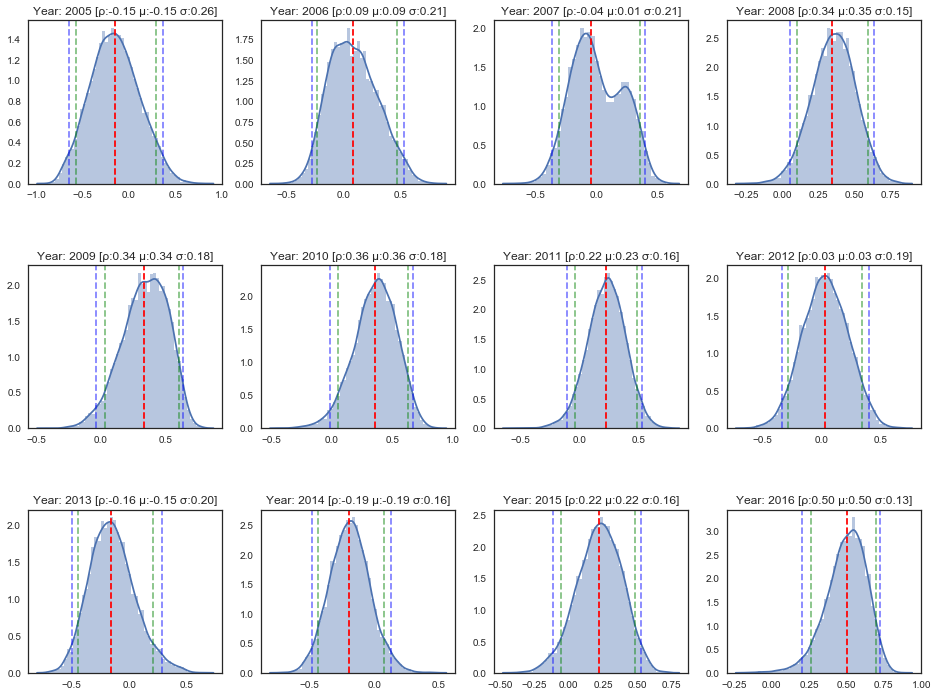

In [183]:
league_boot_summary = generate_boot_stats(); plt.show()

##### League wide bootstrapping Interpretation #####
We can see that the distributions for all samples is relatively symmetric, bell-shaped, and centered near the original sample. Year 2007 is the only sample that shows a slightly bi-modal distribution.  With that in mind, we can use the normal distribution rule of thumb to calculate the 95% confidence interval. We can also calculate the quantiles from the simulations directly. The table shows the statistics that we have collected from our bootstrapping and the confidence intervals using: 

$$CI = regression-coefficient ± 2 (SE)$$
$$and$$
$$CI = Quantile(0.025), Quantile(0.975)$$


As can be seen from the table, only two of the entries do not have the null value '0' in their confidence interval. It means that for most of the simulations, we fail to reject the null hypothesis that the correlation may just be happening by random chance. 

In [185]:
league_boot_summary

,Year,Observed R,Boot Mean,Boot SE,Mean-2SE,Mean+2SE,95% Conf. Int. Q(0.025),Q(0.975),90% Conf. Int Q(0.05),Q(0.95)
0,2005,-0.15,-0.15,0.27,-0.68,0.38,-0.65,0.39,-0.58,0.30
1,2006,0.09,0.09,0.21,-0.34,0.52,-0.28,0.53,-0.23,0.46
2,2007,-0.04,0.00,0.21,-0.41,0.42,-0.35,0.39,-0.31,0.35
3,2008,0.34,0.36,0.15,0.06,0.65,0.06,0.64,0.11,0.60
4,2009,0.34,0.34,0.18,-0.01,0.70,-0.03,0.64,0.03,0.61
5,2010,0.36,0.36,0.18,0.00,0.71,-0.02,0.67,0.05,0.63
6,2011,0.22,0.23,0.16,-0.09,0.54,-0.09,0.52,-0.04,0.48
7,2012,0.03,0.03,0.19,-0.34,0.41,-0.33,0.40,-0.28,0.34
8,2013,-0.16,-0.15,0.19,-0.54,0.24,-0.49,0.28,-0.44,0.20
9,2014,-0.19,-0.19,0.15,-0.50,0.12,-0.48,0.13,-0.43,0.07


#### Conference based Bootstraps
Our league wide bootstraps did not inspire confidence about there being a hard to refute correlation between wins and money spent on teams. As we have iterated before, there are differences between the make up of eastern and western conferences. Following are charts and summary for both conferences followed by tabular summaries. Although, tabular summaries may be enough to deduce conclusions in this case, looking at the actual shape of the distribution is still a valid experience as we can see next.

##### Eastern Conference #####

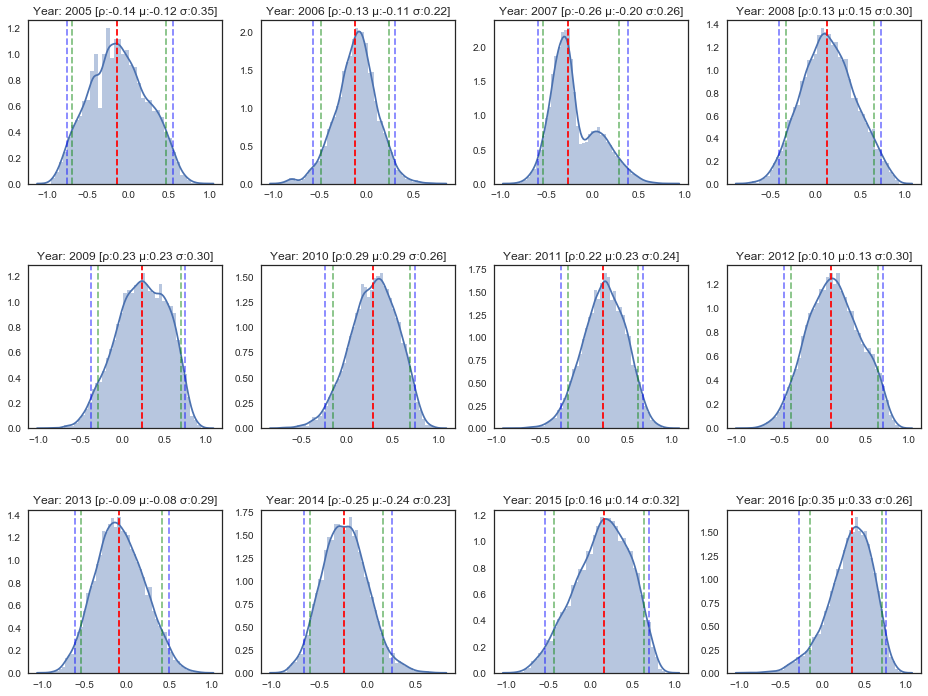

In [186]:
eastern_conf_summary = generate_boot_stats(team_ids = get_team_ids_east())

In [187]:
eastern_conf_summary

,Year,Observed R,Boot Mean,Boot SE,Mean-2SE,Mean+2SE,95% Conf. Int. Q(0.025),Q(0.975),90% Conf. Int Q(0.05),Q(0.95)
0,2005,-0.14,-0.12,0.35,-0.82,0.58,-0.76,0.55,-0.70,0.47
1,2006,-0.13,-0.11,0.22,-0.55,0.33,-0.58,0.30,-0.48,0.24
2,2007,-0.26,-0.20,0.26,-0.71,0.31,-0.59,0.38,-0.54,0.29
3,2008,0.13,0.15,0.30,-0.44,0.74,-0.40,0.73,-0.32,0.65
4,2009,0.23,0.23,0.30,-0.37,0.84,-0.37,0.74,-0.30,0.70
5,2010,0.29,0.29,0.26,-0.22,0.81,-0.24,0.74,-0.15,0.69
6,2011,0.22,0.23,0.24,-0.26,0.72,-0.26,0.67,-0.18,0.62
7,2012,0.10,0.13,0.30,-0.48,0.74,-0.45,0.70,-0.37,0.64
8,2013,-0.09,-0.08,0.29,-0.66,0.50,-0.61,0.50,-0.54,0.41
9,2014,-0.25,-0.24,0.23,-0.71,0.23,-0.67,0.25,-0.60,0.15


##### Western Conference #####

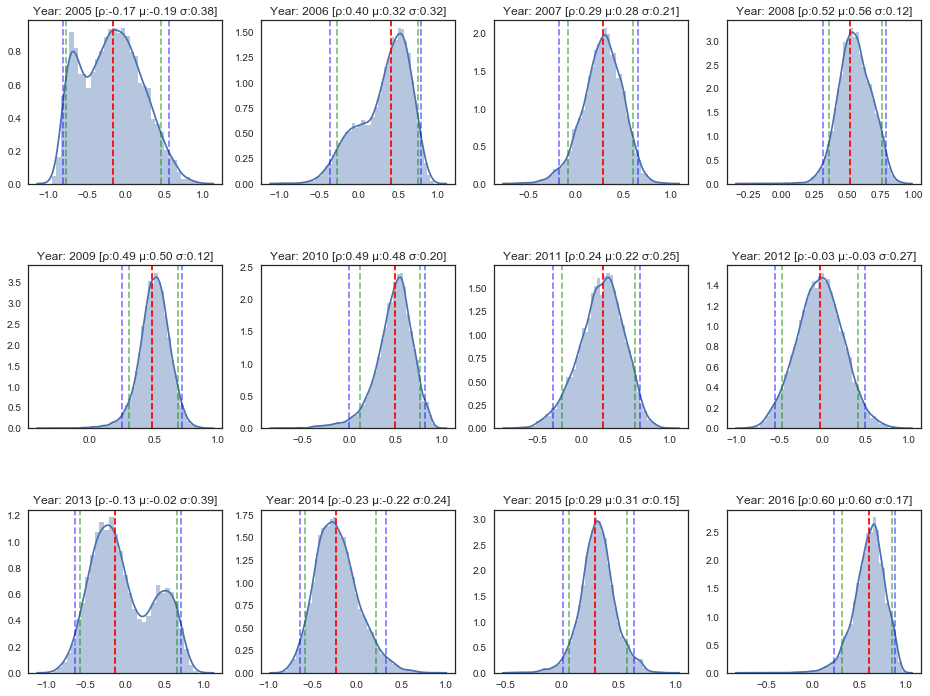

In [188]:
western_conf_summary = generate_boot_stats(team_ids = get_team_ids_west())

In [189]:
western_conf_summary

,Year,Observed R,Boot Mean,Boot SE,Mean-2SE,Mean+2SE,95% Conf. Int. Q(0.025),Q(0.975),90% Conf. Int Q(0.05),Q(0.95)
0,2005,-0.17,-0.19,0.38,-0.96,0.58,-0.82,0.56,-0.78,0.45
1,2006,0.40,0.32,0.32,-0.31,0.96,-0.36,0.78,-0.27,0.74
2,2007,0.29,0.28,0.21,-0.14,0.70,-0.18,0.65,-0.09,0.61
3,2008,0.52,0.56,0.12,0.31,0.81,0.32,0.79,0.36,0.76
4,2009,0.49,0.50,0.12,0.27,0.74,0.25,0.72,0.30,0.68
5,2010,0.49,0.48,0.20,0.07,0.89,-0.01,0.82,0.12,0.76
6,2011,0.24,0.22,0.25,-0.28,0.72,-0.32,0.66,-0.22,0.61
7,2012,-0.03,-0.03,0.27,-0.56,0.50,-0.55,0.49,-0.47,0.41
8,2013,-0.13,-0.02,0.39,-0.81,0.77,-0.64,0.71,-0.58,0.65
9,2014,-0.23,-0.22,0.24,-0.71,0.27,-0.64,0.32,-0.58,0.22


##### Conference based bootstrapping Interpretation #####

A couple of the charts display distributions that seem to be bi-modal: Eastern Conference 2007 and Western Conference 2013. Essentially it shows that within the conference, there were groupings of teams behaving in different ways. It may be possible that digging futher we can find out if there is inherent grouping within the conference but the years before and after do not indicate any trend one way or other. Similarly other years do not show this trend and this peculiar phenomenon would be averaged out. So we will leave it at that. 

All confidence intervals for the Eastern conference have a null value (zero) in the intervals. This indicates that any correlation that we see may be by random chance. 

Three of the confidence intervals for the Western Conference are on the +ve side. A couple more start with zero as the lower bound. So Western conference does show some signs that there is a correlation between spending money and getting wins.


### Part 4 Bootstrapping Summary
Bootstrap results were inconsistent in rejecting the null hypothesis that there is no correlation between the money spent and wins. This is more pronounced for 95% confidence intervals. For a 90% CI, nearly half of the entries in overall league and western conference show a relationship between money spend and number of wins. 

##### 95% Confidence Interval
- League wide summary showed a couple of years where the variables seem to be related. Breaking them down on a conference basic showed some more interesting results.
- Eastern conference was dismal in showing any correlation. Not even 1 in the 12 years analyzed showed and relationship. Infact the spread was so great that the closest to displaying any correlation was from -0.24 to 0.74. The others were even further apart.
- Western conference had some years when there was some obvious correlation but those years were always bookended with years that did not show any correlation.

##### 90% Confidence Interval#####
- League wide summary shows that in nearly half of the years, there is a +ve relatioship between the number of wins and money spend.
- Eastern Conference still has no entry which did not have the null entry.
- Western Conference has half of the entries with a +ve relationship between the number of wins and money spend.

[Back to TOC](#Table-of-contents)
<a id='conclusions'></a>
# Conclusions and Recommendations
![](images/section_line.png)
![](images/conclusions.png)
It has been said that it is possible to prove anything by self serving statistical analysis. Nicolas Cage pun being one of the proofs (whether the relationship is correct or not, I am not sure). However, in our case, try as we may, we are not able to prove that any meaningful relationship exists between money spent and wins achieved. This is a logic defying result and the only saving grace is that even though we cannot reject the null hypothesis that there is no relationship, statistically speaking it does not mean that the null hypothesis is true. There may be other hidden factors at play. The summary of our report follows:
<hr>
### Assumptions and analysis
We started with the assumption that:
- The total money spent on a team results in more wins
- The composition of a team in terms of higly paid stars plays a role. For example, a team with 3 highest paid cumulative salaries win more games than a team with 2 highly paid stars.

The data does not necessarily support our first hypothesis. There seems to be some predictable but hard to analyze forces at play. We could see that the teams tend to start winning commensurate with their spendings but then something happens that shifts the balance of power in the teams. Some player gets injured, a super star changes team, a gifted rookie enters the league (rookies are paid far less). Any of these things or more creates a domino effect over the league

** Machine Learning Analysis: ** We then created fine grained dataset which consisted of individual player salary for each of the 30 teams for the 12 year period. We then subjected this data to a slew of machine learning techniques: logistic regression with various optimizations, Ada boosted analysis, neural network analysis, and .. None of the techniques were able to discover anything to create a useful model. 

** Bootstrap Analysis: ** After machine learning was unable create a viable model, we did a bootstrap analyis on the data. Bootstrap analysis does not makes any assumption about the model so it can be used when other traditional methods fail. We used paired values of  wins/salaries to create 10,000 samples for each year. The intent was to see if the observed value for the coefficient of regression reflect the fact that the values that we see are not by chance. However, the bootstrap just confirmed the models computed by machine learning and our initial explorations. In nearly all bootstrap simulations, we see that the observed value is pretty much in the middle of simulation.


### Interpreting/Rationalizing the result of analysis
As I have said repeatedly, NBA teams spend a ton of money on stars to make their team competitive. The owners are saavy business men (i dont know of any woman owner) and the general managers and scouts are seasoned professionals. Since "Moneyball" exploded on the scene, they have also employed a number of data analysts to use advanced metrics to create competitive teams. Why does it then seem that the teams seem to be throwing money around without any discernible results ? A closer look at the trends provide some clue to what may be happening. The NBA has an everchanging landscape with teams coming up with new formulae for success. I am reproducing a couple of charts below which show that over time we fan see a trend that more money thrown at players result in more wins. But as soon as the teams are able to figure out the ideal team composition some other team ups the ante and the mad dash begins again.

- In the 90s and early 2000s either one super star or a superstar/sidekick combo was the preferred mode of domination. Pairs such as Jordan/Pippen, Shaq/Kobe dominated the scene.

- In the mid 2000s things changed a little little more interesting with Celtics creating the Big Three with Garnett, Pierce and Ray Allen.

- The Big Three concept was taken to its height with Miami Heat able to recruit LeBron, Wade and Chris Bosh. Each of the player took a paycut and the team dominated NBA for the next 4 years. 

- Mid 2010s saw Golden State creating an even more potent team with 4 stars in the staring lineup with Curry, Durant, Thompson and Green. Golden State also featured another superstar in Andre Iguoudala who came off the bench to spark the second unit. Other teams are still adjusting to this new reality and adding pieces. 

- The other teams are now in a mad rush to compete with 3 stars becoming the new norm. OKC now has Russell, Anthony and Paul George.

Over time there have been exceptions such as Detroit Pistons and the continued excellence of San Antonio Spurs able to create teams with sustained teamwork. 

### Recommendations
Over the years, performance metrics such as PER (Player Efficiency Ratio) and Player Win Share have been developed that more accurately predict whether a team would make the playoffs. We hoped to do the same with the maoney being spend, but as our analysis have shown, larger salaries dont seem to play any direct part in wins. However, as I have indicated in the previous secion, that may have more to do with the changing landscape of NBA and for the teams to constantly re-invent themselves. There are some teams that are better at spending money for sustained excellence but they are exceptions rather than the norm. Teams history do play a part in wins. That mostly refers to the big markets, deep pocketed owners and good management but these nuances are hard to codify and will need more work. A more integrated module will be able to add the player performance stats with the salary info as well as the team management and coaching history to create an even better prediction model.

![](images/the_end.png)

[Back to TOC](#Table-of-contents)

<a id='scripts'></a>
# Appendix - Scripts

I have all scripts at the end instead of upfront so that it does not interfere with the flow of the report. This section also contains some high level methods that are then called from the main doc. Just to be clear, these scripts have to be first run before these methods can be called.

In [1]:
'''
***** DATA PREP *****
- collecting the data from online sources
- hardwiring some data that is readily available online and will not change
- cleaning up salary data for multiple exceptional cases.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from sklearn.utils import resample

import urllib.request
from bs4 import BeautifulSoup 
    
import os
import time

%matplotlib inline


'''
Teams, their cities and conference association
'''
teams = { 
    'ATL': ('Atlanta', 'Hawks', 'Eastern'),
    'BRK': ('Brooklyn', 'Nets', 'Eastern'),
    'BOS': ('Boston', 'Celtics', 'Eastern'),
    'CHO': ('Charlotte', 'Hornets', 'Eastern'),
    'CHI': ('Chicago', 'Bulls', 'Eastern'),
    'CLE': ('Cleveland', 'Cavaliars', 'Eastern'),
    'DAL': ('Dallas', 'Mavericks', 'Western'),
    'DEN': ('Denver', 'Nuggets', 'Western'),
    'DET': ('Detroit', 'Pistons', 'Eastern'),
    'GSW': ('Oakland', 'Warriors', 'Western'),
    'HOU': ('Houston', 'Rockets', 'Western'),
    'IND': ('Indiana', 'Pacers', 'Eastern'),
    'LAC': ('Los Angeles', 'Clippers', 'Western'),
    'LAL': ('Los Angeles', 'Lakers', 'Western'),
    'MEM': ('Memphis', 'Grizzlies', 'Western'),
    'MIA': ('Miami', 'Heat', 'Eastern'),
    'MIL': ('Milwaukee', 'Bucks', 'Eastern'),
    'MIN': ('Minnesota', 'Timberwolves', 'Western'),
    'NOP': ('New Oreleans', 'Pelicans', 'Western'),
    'NYK': ('New York', 'Knicks', 'Eastern'),
    'OKC': ('Oklahoma City', 'Thunder', 'Western'),
    'ORL': ('Orlando', 'Magic', 'Eastern'),
    'PHI': ('Philadelphia', '76ers', 'Eastern'),
    'PHO': ('Phoenix', 'Suns', 'Western'),
    'POR': ('Portland', 'Trail Blazers', 'Western'),
    'SAC': ('Sacramento', 'Kings', 'Western'),
    'SAS': ('San Antonio', 'Spurs', 'Western'),
    'TOR': ('Toronto', 'Raptors', 'Eastern'),
    'UTA': ('Utah', 'Jazz', 'Western'),
    'WAS': ('Washington', 'Wizards', 'Eastern')
}


'''
Team ids for the league
'''
team_ids_pr = [
    'ATL','BRK', 'BOS', 'CHO', 'CHI', 'CLE', 'DAL', 'DEN', 
    'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 
    'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL',  'PHI', 'PHO', 
    'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']

'''
Team ids for eastern conference
'''
team_ids_east_pr = [
    'ATL','BRK', 'BOS', 'CHO', 'CHI', 'CLE', 'DET', 'IND', 
    'MIA', 'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS']

'''
Team ids for western conference
'''
team_ids_west_pr = [
    'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 
    'NOP', 'OKC', 'PHO', 'POR', 'SAC', 'SAS',  'UTA', ]

def get_team_ids():
    return list(team_ids_pr)
def get_team_ids_east():
    return list(team_ids_east_pr)
def get_team_ids_west():
    return list(team_ids_west_pr)


'''
Years for which we need the salary info
'''
team_sal_years = ['2001', '2002', '2003', '2004', '2005', '2006', 
             '2007', '2008', '2009', '2010', '2011', '2012', 
             '2013', '2014', '2015', '2016']

team_sal_years2 = ['2001', '2002', '2003', '2004', '2005', '2006', 
             '2007', '2008', '2009', '2010', '2011', '2012', 
             '2013', '2014', '2015', '2016', '2017', '2018']

def get_effective_years():
    years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
    return years



'''
League wide salary cap for all the teams
'2000': (57684000),
'''
league_sal_cap = { 
    #'2001': (53777000),
    #'2002': (57239000),
    #'2003': (55792000),
    #'2004': (60889000),
    '2005': (63318000),
    '2006': (64455000),
    '2007': (65475000),
    '2008': (64612000),
    '2009': (63948000),
    '2010': (61991000),
    '2011': (60734000),
    '2012': (60512000),
    '2013': (63997000),
    '2014': (70951000),
    '2015': (94143000),
    '2016': (99093000),
    '2017': (101000000)
}
def get_salary_cap_df():
    df = pd.DataFrame(list(league_sal_cap.items()), columns=['year', 'cap'])
    return df


'''
Return win loss records for all years for all teams
as a pandas data frame
'''
def get_raw_win_loss_df():
    df = pd.read_csv('data/win_loss.csv')
    df.sort_values(by=['team_id'], inplace=True)
    return df


'''
Return a smaller set of win loss records with some columns removed
'''
def get_win_loss_df():
    df = get_raw_win_loss_df().copy()
    df.set_index('team_id', inplace=True)
    del df['team_name']
    del df['conference']
    
    replace_val = int(np.round(np.mean(df.loc['CHO'][3:])))
    df.loc['CHO'].replace(-1, replace_val, inplace=True)
    
    return df


'''
Return playoff records for all teams for all years
'''
def get_playoffs_df():
    df = pd.read_csv('data/playoffs.csv')
    df.sort_values(by=['team_id'], inplace=True)
    df.set_index('team_id', inplace=True)
    return df



/Users/nurulzaman/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
'''
**** GETTING TEAM SALARIES ****
Getting team salaries is fairly involved and therefore requires a section 
of it own. To get the salaries
- first create a url that points to that speicific team for that year
- scrape the information for salary for all players
- download and save the information locally
'''


'''
Get team salary by going to the correct URL that is already indexed by 
team name and year. The only problem is that some teams have changed 
cities and/or changed their names over time. So a lot of exceptional 
scenarios need to be handled to create the correct URL.
'''    
def gen_team_sal_urls():
    br_team_sal_page_url = "https://www.basketball-reference.com/teams/"
    team_urls = []
    orig_team_name = None
    for team in teams.keys():
        orig_team_name = team
        for year in team_sal_years:
            year = int(year)
            if team == 'MEM' and year == 2001:
                team = 'VAN'
            if team == 'VAN' and year != 2001:
                team = 'MEM'

            if team == 'OKC' and year in (2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008):
                team = 'SEA'
            if team == 'SEA' and year not in (2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008):
                team = 'OKC'

            #BRK
            if team == 'BRK' and year in range(2001,2013):
                team = 'NJN'
            if team == 'NJN' and year not in range(2001, 2013):
                team = 'BRK'

            #Charlotte - started in 2005 as hornets - changed to bobcats
            if team == 'CHO' and year in ([2001, 2002, 2003, 2004]):
                continue
            if team == 'CHO' and year in range(2005, 2015):
                team = 'CHA'  
            if team == 'CHA' and year not in range(2001,2015):
                team = 'CHO'  

            #New orleans - started in 2003 as hornets - then hornets okc - then pelicans
            if (team == 'NOP' or team == 'NOH') and year in ([2001,2002]):
                continue
            if (team == 'NOP' or team == 'NOH') and year in range(2006,2008):
                team = 'NOK'
            if (team == 'NOP' or team == 'NOK') and year in range(2008,2014):
                team = 'NOH'
            if (team == 'NOP' or team == 'NOK') and year in range(2001, 2006):
                team = 'NOH'
            if (team == 'NOH' or team == 'NOK') and year not in range(2001,2014):
                team = 'NOP'

            team_url = br_team_sal_page_url + team + "/" + str(year) + ".html"
            team_url_info = (team_url, orig_team_name, year)
            team_urls.append(team_url_info)
    return team_urls


'''
Filter the list of team urls and info to return only 
the ones for the paritcular years and teams
'''
def gen_team_sal_urls_for( teams=None, years=None ):
    
    urls = gen_team_sal_urls()
    if teams == None and years == None:
        return urls
    
    urls_teams = []
    if teams != None:
        for url in urls:
            for team in teams:
                if url[1] == team:
                    urls_teams.append(url)
                
    urls_years = []
    if years == None:
        return urls_teams
    else:        
        for url in urls_teams:
            for year in years:
                if str(url[2]) == str(year):
                    urls_years.append(url)
    return urls_years
    


def get_cached_sals():
    for team in teams.keys():
        for year in team_sal_years:
            print(year + "_" + team + "_sal.csv")

            
            
'''
Read from url or throw exception
'''
def get_page(url):
    import urllib.request
    
    page = None
    try:
        f = urllib.request.urlopen(url)
        page = f.read()
    except:
        print ("Error getting data from url")
    return page



'''
Download the salary table for every player for that particular 
year and a particular team passed in the arguments. This table 
is defined inside some javscript generated comments so it 
has to be scraped out using comment parsing. 

The table is stored as file prefixed with team name and year.
e.g. ATL_2018_salary.csv
'''
def download_sal_info(url, year, team):
    from bs4 import BeautifulSoup, Comment
    import pandas as pd
    import os
    
    csv = team + '_' + str(year) + '_salary.csv'
    page = get_page(url)
    soup = BeautifulSoup(page, "lxml")
    comments = soup.findAll(text=lambda text:isinstance(text, Comment))
    
    table = None
    for comment in comments:
        t = comment.extract()
        if 'table' in t and 'id="salaries2"' in t:
            table = BeautifulSoup(''.join(t), "lxml")
    headers = ['name', 'salary']
    rows = []
    for row in table.findAll('tr'):
        cols = row.findAll('td')
        col_idx = 0
        record = {}
        for col in cols:
            record[headers[col_idx]] = col.get_text()
            col_idx += 1
        rows.append(record)
    df = pd.DataFrame (rows)
    df = df.dropna(axis=0, how='any')
    df['year'] = year
    df['team'] = team
    return df



'''
If the file has already been donwloaded then get it from 
the cache and return othewise download and return it.
'''
def get_sal_info(url, year, team, loc='data/team_salaries', cached=True, delay=3):
    
    df = None
    csv = None
    
    if loc == None:
        csv = team + '_' + str(year) + '_salary.csv'
    else:
        csv = loc + '/' + team + '_' + str(year) + '_salary.csv'

    if os.path.exists(csv) and cached:
        df = pd.read_csv(csv)
    else:
        df = download_sal_info(url, year, team)
        df.to_csv(csv, encoding='utf-8', index=False)
        if delay > 0:
            time.sleep(delay)

    
    return df


'''
Returns all downloaded team salaries as a data frame
'''
def get_sals_df(loc='data/team_salaries', which_teams=None, which_years=None):
    
    csv = None
    df = pd.DataFrame()
    for team in teams.keys():
        for year in team_sal_years:
            csv = loc + '/' + team + '_' + str(year) + '_salary.csv'
            if os.path.exists(csv):
                if which_teams != None and team not in which_teams:
                    continue
                if which_years != None and year not in which_years:
                    continue 
                df_temp = pd.read_csv(csv)
                df_temp['salary'] = df_temp['salary'].str.replace(',', '')
                df_temp['salary'] = df_temp['salary'].str.replace('$', '')
                df_temp['salary'] = pd.to_numeric(df_temp['salary'], errors='coerce')
                df = pd.concat([df, df_temp], ignore_index=True)
                
    df.rename(columns = {'team':'team_id'}, inplace=True)
    return df


def get_agg_salary_df(arg_df):
    df = arg_df[['year', 'team_id', 'salary']]
    dfg = df.groupby(['year', 'team_id'])[['salary']].sum()
    dfg_unstacked = dfg.unstack()
    dfg_unstacked.reset_index(inplace=True)
    dfg_unstacked.set_index('year', inplace=True)
    return dfg_unstacked['salary']




In [24]:
'''
Plot team salary vs wins for a specific year.
'''
def plot_team_salary_vs_wins_for_year(team_ids, year, axis, draw=True): 

    d1 = pd.DataFrame( get_agg_salary_df(get_sals_df())[team_ids].loc[year] )
    d2 = pd.DataFrame( get_win_loss_df().loc[team_ids][str(year)])

    d3 = pd.DataFrame(index=d1.index.values)
    d3['salary'] = d1.values
    d3['wins'] = d2.values
    corrf = "%0.2f"% (pearsonr(d1.values, d2.values)[0])
    if draw==True:
        sns.regplot('salary', 'wins', data=d3, ax=axis)
        corrs = 'R: ' + str(corrf)
        title = ('Year: ' + str(year) + ' [' + corrs + ']')
        axis.set_title(title)
        
    return corrf


'''
Plot team salary vs wins for each year. 
Enumerates each year internally and calls another method 
to plot for that particular year.

Returns the correlation collected for each year as an array.

draw=True is used to collect only correlations or collect and draw.
'''
def plot_team_salary_vs_wins(team_ids, draw=True):
    corrs = []
    years = get_effective_years()
    if draw==True:
        r_size, c_size = 16, 4
        cols = c_size
        rows = len(years)/cols 
        fig = plt.figure(figsize=(r_size,rows*c_size))
        plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        fig.clf()

    for i, year in enumerate(years):
        ax = None
        if draw==True:
            ax = fig.add_subplot(rows, cols, i + 1)
        corr = plot_team_salary_vs_wins_for_year(team_ids, year, ax, draw) 
        corrs.append(corr)
    return corrs


'''
Returns the correlations (salaries vs wins) for all years
Internally just uses the plot method with draw as False.
'''
def get_salary_vs_wins_corrs():

    corrs_all = pd.DataFrame(index=range(2005,2017)) # show a few
    res_all = draw_regplots(get_team_ids(), draw=False)
    corrs_all['League'] = res_all
    
    res_east = draw_regplots(get_team_ids_east(), draw=False)
    corrs_all['East'] = res_east
    
    res_west = draw_regplots(get_team_ids_west(), draw=False)
    corrs_all['West'] = res_west
    
    return corrs_all


'''
Plots salary vs wins coefficients as line graphs over the years.
The three lines are league, eastern conf, western conf.
'''
def plot_salary_vs_wins_corrs():

    fig = plt.figure(figsize=(12,4))
    ax = plt.subplot(1,1,1)
    fig.clf()
    plt.xlabel('Years')
    plt.ylabel('Win/Salary Ratio')
    plt.title('League/Conf average wins against money spend')

    corrs_all = get_teamwork_corrs()
    plt.plot(corrs_all.League, label='League')
    plt.plot(corrs_all.East, label='East')
    plt.plot(corrs_all.West, label='West')
    plt.legend()

    plt.show()
    

'''
To compare all teams on the same plot, the salaries need to be nomralized.
- so we use the 2017 salary cap (101,000,000 dollars) as the baseline
- create a salary factor by dividing the 2017 cap by that year
- multiply each salary by that factor

To aid in more calculations, we also add the wins to the dataset.
'''
def get_all_normalized_salaries():

    cap = get_salary_cap_df()
    sals = get_sals_df()
    wdf=get_win_loss_df()

    cap ['factor_2017'] = 101000000 / cap['cap']
    cap['year'] = cap['year'].astype(str).astype(int)
    merged = pd.merge(sals, cap, how='inner', on = 'year')

    sals_2017 = merged.salary * merged['factor_2017']
    merged['salary_2017'] = sals_2017
    merged = merged.dropna()
    merged = merged.drop_duplicates()
    def get_wins(x):
        return  wdf[[str(x['year'])]].loc[x['team_id']].values[0]
    merged ['wins'] = 0
    merged['wins'] = merged.apply(get_wins, axis=1)
    merged = merged[['year', 'team_id', 'salary', 'salary_2017']]
    grpd = merged.groupby(['year', 'team_id']).sum()
    grpd.reset_index(inplace=True)
    grpd['wins'] = grpd.apply(get_wins, axis=1)
    
    return grpd


'''
A wrapper method for showing the normalized plots 
- combined = False means that just display the lmplot
- we dont need to show the joint plots since we are already showing the hists and scatters.
'''
def plot_normalized_salaries_vs_wins(df, combined = False):
    if combined:
        sns.jointplot(x="salary_2017", y="wins", data=df, kind = "reg", size=6)
    else:
        sns.lmplot(x="salary_2017", y="wins", hue="year", truncate=True, data=df, size=8)
    plt.xlabel("Salary in 2017 Dollars [100s of millions]")    
    

'''
Using the normalized dataset plot
- histogram for salaries across the years
- hist for wins across the years
- relationship (scatter) for salaries against wins
'''
def plot_salary_and_wins_relationship(df):
    fig = plt.figure(figsize=(16,4))
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    fig.clf()
    
    ax = fig.add_subplot(1, 3, 1)
    ax.hist(df.salary_2017, bins=50)
    ax.set_title("Salary Distribution")
    ax.set_xlabel("Salary in 2017 Dollars")
    ax.set_ylabel("Number of players")
    
    ax = fig.add_subplot(1, 3, 2)
    ax.hist(df.wins, bins=50)
    ax.set_title("Wins Distribution")
    ax.set_xlabel("Total wins by teams")
    ax.set_ylabel("Number of teams")

    ax = fig.add_subplot(1, 3, 3)
    #ax.scatter(df.salary_2017, df.wins)  
    sns.regplot('salary_2017', 'wins', data=df)  
    ax.set_title("Salary vs. Wins")
    ax.set_xlabel("Salary in 2017 Dollars")
    ax.set_ylabel("Total wins by teams")
    
    plt.show()


In [223]:
'''
***** Part 2 - WINS FOR DIFFERENT TEAM COMPOSITIONS  *****
'''

def get_top_player_symbols():
    tops = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11']
    return tops

def get_top_player_symbols_truncated():
    tops = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
    return tops



'''
This is the mother of all methods for figuring out best paid players on a team.
- groups the data by team-id
- shrinks down the data by year
- sorts the data in ascending order
- returns the sum of the columns based on nlargest argument

nlargest is the number of stars on the team.
    - if nlargest = 1, return the salary of the top star
    - if nlargest = 2, return the combined salary of top 2 stars
    and so on
'''
def get_highest_paid_players(nlargest, wins_df, sals_df, years=get_effective_years()):
    df_tops = []
    for i, year in enumerate(years):
        
        wins = wins_df[str(year)]

        df = sals_df
        dfg = df[df['year'] == year].groupby('team_id')

        tops = []
        keys = []
        for key, gr in dfg:
            keys.append(key)
            
            if nlargest == 11:
                tops.append( sum (sorted(gr.salary)[-11:]) )
                
            elif nlargest == 10:
                tops.append( sum (sorted(gr.salary)[-10:]) )
                
            elif nlargest == 9:
                tops.append( sum (sorted(gr.salary)[-9:]) )
                
            elif nlargest == 8:
                tops.append( sum (sorted(gr.salary)[-8:]) )
                
            elif nlargest == 7:
                tops.append( sum (sorted(gr.salary)[-7:]) )
                
            elif nlargest == 6:
                tops.append( sum (sorted(gr.salary)[-6:]) )
                
            elif nlargest == 5:
                tops.append( sum (sorted(gr.salary)[-5:]) )
                
            elif nlargest == 4:
                tops.append( sum (sorted(gr.salary)[-4:]) )
                
            elif nlargest == 3:
                tops.append( sum (sorted(gr.salary)[-3:]) )
                
            elif nlargest == 2:
                tops.append( sum (sorted(gr.salary)[-2:]) )
                
            else:
                tops.append( sum (sorted(gr.salary)[-1:]) )

        df_top = pd.DataFrame({'salary': tops, 'wins': wins}, index=keys)
        df_tops.append(df_top)
    return df_tops


'''
A wrapper around the get_stars method.
Creates the enumeration to call the previous method.

first_four flag is used to restrict the number of rows returned
so that the plot drawn in not too over crowded.
'''
def get_highest_paid_players_agg(first_four=True, years=get_effective_years()):
    
    wins_df = get_win_loss_df().copy()
    sals_df = get_sals_df()
    
    tops_dict = {}
    
    tops_dict['T1']= get_stars(1, wins_df, sals_df)
    tops_dict['T2']= get_stars(2, wins_df, sals_df)
    tops_dict['T3']= get_stars(3, wins_df, sals_df)
    tops_dict['T4']= get_stars(4, wins_df, sals_df)
    #if first_four == False:
    tops_dict['T5']= get_stars(5, wins_df, sals_df)
    tops_dict['T6']= get_stars(6, wins_df, sals_df)
    tops_dict['T7']= get_stars(7, wins_df, sals_df)
    tops_dict['T8']= get_stars(8, wins_df, sals_df)
    tops_dict['T9']= get_stars(9, wins_df, sals_df)
    tops_dict['T10']= get_stars(10, wins_df, sals_df)
    tops_dict['T11']= get_stars(11, wins_df, sals_df)

    return tops_dict


def draw_stars(df, year, axis, symbol='T1'): 
    sns.regplot('salary', 'wins', data=df, ax=axis, label=symbol)
    plt.legend(loc='best')
    corrf = "%0.2f"% (pearsonr(df['salary'].values, df['wins'].values)[0])
    corrs = 'R: ' + str(corrf)
    #title = ('Year: ' + str(year) + ' [' + corrs + ']')
    title = ('Year: ' + str(year))

    axis.set_title(title)
    return corrf 

    
def draw_stars_together(dfTops, showAll=False, years=get_effective_years()):
    cols = 3
    rows = len(years)/cols 
    fig = plt.figure(figsize=(16,rows*cols * 2))
    plt.subplots_adjust(wspace = 0.2, hspace = 0.25)
    fig.clf()

    for i, year in enumerate(years):
        if showAll == True:
            for t in get_top_player_symbols():
                ax = fig.add_subplot(rows, cols, i + 1)
                corrf = draw_stars(dfTops[t][i], year, ax, t)
        else:
            for t in get_top_player_symbols_truncated():
                ax = fig.add_subplot(rows, cols, i + 1)
                corrf = draw_stars(dfTops[t][i], year, ax, t)


'''
Returns the corrlations for all years for each star composition.

'''
def get_star_corrs(years=get_effective_years()):
    dfTops = get_stars_all()
    df = pd.DataFrame(dfTops, index = years)
    corrf_all = {}
    tops = get_top_player_symbols()
    for year in years:
        corrf_year = {}
        for top in tops:
            df_Tops = df[top].loc[year]
            if year == 2015:
                pass
                #print (year, 'salary: ', df_Tops['salary'].values, 'wins', df_Tops['wins'].values)
            corrf = "%0.3f"% (pearsonr(df_Tops['salary'].values, df_Tops['wins'].values)[0])
            corrf_year[top] = corrf
        corrf_all[year] = corrf_year
    return corrf_all


def show_boxplots_for_multiple_team_composition():
    df = pd.DataFrame(get_star_corrs()).T
    fig = plt.figure(figsize=(15,5))
    sns.set_style("whitegrid")
    ax = sns.boxplot(data=df)
    ax.set_title("Win share for different team compositions")
    ax.set_xlabel("Team composition according to highest amount paid")
    ax.set_ylabel ("Wins share")
    plt.show()

def summary_table_stars():
    df = pd.DataFrame(get_star_corrs()).T
    df = df.fillna(0)
    df = pd.DataFrame(df, columns = get_top_player_symbols())
    return df



def summary_plots_stars():
    corrs_all = pd.DataFrame(get_star_corrs()).T
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1,1,1)
    #fig.clf()
    ax.set_xlabel('Years')
    ax.set_ylabel('Wins')
    ax.set_title('League/Conf average wins against different team compositions')
    
    ax.plot(corrs_all.T1, label='T1')
    ax.plot(corrs_all.T2, label='T2')
    ax.plot(corrs_all.T3, label='T3')
    ax.plot(corrs_all.T4, label='T4')
    ax.plot(corrs_all.T5, label='T5')
    ax.plot(corrs_all.T6, label='T6')
    ax.plot(corrs_all.T7, label='T7')
    ax.plot(corrs_all.T8, label='T8')
    ax.plot(corrs_all.T9, label='T9')
    ax.plot(corrs_all.T9, label='T10')
    ax.plot(corrs_all.T9, label='T11')
    
    ax.legend(loc='best', fancybox=True, framealpha=0.5)
    ax.grid()

    
def plot_team_composition_relationships():
    df = pd.DataFrame(get_star_corrs()).T
    df.fillna(0)
    for t in get_top_player_symbols():
        df[t] = df[t].astype(str).astype(float)
    filtered_df = df.dropna(how='all')
    filtered_df = pd.DataFrame(filtered_df, columns = get_top_player_symbols())
    del filtered_df['T7']
    del filtered_df['T8']
    del filtered_df['T9']
    del filtered_df['T10']
    del filtered_df['T11']
    sns.pairplot(data=filtered_df)
    plt.show()

            
def plot_wins_for_teams_with_highest_paid_players():
    tops = pd.DataFrame(get_highest_paid_player_agg(), columns = get_top_player_symbols())
    draw_stars_together(tops)

In [6]:
'''
***** Part 3 - MACHINE LEARNING *****
Methods for creating the prediction dataset.
'''
def get_conf_win_loss_df():
    df = get_raw_win_loss_df().copy()
    df_conf = df[['team_id', 'conference']]
    df_conf.set_index('team_id', inplace=True)
    return df_conf

def create_prediction_df(normed=True, wins=False):
    
    players = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10', 'P11']
    vals_all = []
    df_sals = get_sals_df()
    df_wins = get_win_loss_df()
    df_conf = get_conf_win_loss_df()
    df_playoffs = get_playoffs_df()
    dfc = get_salary_cap_df()
    
    cols = ['year', 'team_id', 'conf', 'playoffs', 'wins', 'salary_cap']
    cols.extend(players)
    
    for i in get_effective_years():
        dfy = df_sals[df_sals['year'] == i]
        
        for team in get_team_ids():
            df = dfy[dfy['team_id'] == team]
            df = df.sort_values('salary', ascending=False)
            df = df[:11] #only the top 10
                        
            vals = [] 
            vals.append(df['year'].iloc[0])
            vals.append(df['team_id'].iloc[0])
            vals.append(df_conf.loc[team].values[0]) #conf
            vals.append(df_playoffs[[str(i)]].loc[team].values[0]) #playoffs
                        
            vals.append(df_wins[str(i)][team])
            vals.append(dfc[dfc.year == str(i)]['cap'].values[0])  

            for j in np.arange(0,11):
                vals.append(df['salary'].iloc[j])

            df['year'].iloc[0]
            df['team_id'].iloc[0]
            df['salary'].iloc[1]

            vals_all.append(vals)
    df_all = pd.DataFrame(data = vals_all, columns=cols)
 
    if normed == True:
        df_normed = df_all[players].div(df_all.salary_cap, axis = 0)
        if wins == True:
            df_header = df_all[['year', 'team_id', 'conf', 'wins']]
        else:
            df_header = df_all[['year', 'team_id', 'conf']] #, 'wins'
        df_trailer = df_all[['playoffs']]
        df_all = pd.concat([df_header, df_normed, df_trailer], axis='columns')
        
    df_all = df_all.round(3)
    return df_all


def show_salary_distribution():
    players = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10', 'P11']
    df = create_prediction_df(normed=True)
    df_p= df[['P1','P2','P3','P4', 'P5','P6','P7','P8', 'P9', 'P10', 'P11']]
    fig = plt.figure(figsize=(15, 4))
    sns.boxplot(data=df_p)
    plt.title('Distribution of salaries')
    plt.xlabel('Salaries for top rated stars')
    plt.show
    

In [7]:
'''
***** Part 4 - BOOTSTRAP *****
Methods for resampling and generating bootstrap simulations, 
providing summary and drawing plots.
'''


'''
Returns the boot strap correlation given a paired sample.
salaries: salaries for a particular year for all teams
wins: the wins for all teams for that year
reps: number of resamplings

returns: an array of pearson coefficent for that year
'''
def bootstrap_corrs(sals, wins, reps=1000):
    corrs = []

    for i in np.arange(reps):
        sals_boot = []
        wins_boot = []
        
        #create a tuple of salary and wins and resample
        paired = []
        for i in np.arange(len(sals)):
            paired.append((sals[i], wins[i]))
        res = resample(paired)
        paired = None
        
        #from the resample results, generate pearsonr
        for tup in res:
            sals_boot.append(tup[0])
            wins_boot.append(tup[1])
        corrs.append(pearsonr(sals_boot, wins_boot)[0])
    return corrs


'''
Given a year, creates bootstrap distribution for samples and 
calculates the correlations.

Returns:
- mean for the correlations
- standard dev. for the correlations 
- 0.025 quantile for lower bound of 95%
- 0.975 quantile for upper bound of 95%
- 0.05 quantile for lower bound of 90%
- 0.95 quantile for upper bound of 90%
'''
def get_bootstrap_corrs(year, reps=10000, team_ids = get_team_ids()):

    sals = get_agg_salary_df(get_sals_df())[team_ids].loc[year:].iloc[0].values
    wins = get_win_loss_df().loc[team_ids][str(year)].values
    
    
    orig = pearsonr(sals, wins)[0]
    corrs = bootstrap_corrs(sals, wins, reps)

    m_corrs = np.mean(corrs)
    sd_corrs = np.std(corrs)
    
    rho = 'ρ:' + str("%0.2f"% orig)
    m = 'μ:'  + str("%0.2f"% m_corrs)
    sd = 'σ:'  + str("%0.2f"% sd_corrs)
    q025 = pd.Series(corrs).quantile(0.025)
    q975 = pd.Series(corrs).quantile(0.975)
    q05 = pd.Series(corrs).quantile(0.05)
    q95 = pd.Series(corrs).quantile(0.95)
    title_info = rho + ' ' + m + ' ' + sd

    sns.distplot(corrs, kde=True)
    plt.axvline(orig, color="r", linestyle="--")
    plt.axvline(q025, color="b", linestyle="--", alpha = 0.5)
    plt.axvline(q975, color="b", linestyle="--", alpha = 0.5)
    plt.axvline(q05, color="g", linestyle="--", alpha = 0.5)
    plt.axvline(q95, color="g", linestyle="--", alpha = 0.5)
    
    plt.title('Year: ' + str(year) + ' [' + title_info + ']')
    return (orig, m_corrs, sd_corrs, q025, q975, q05, q95)


'''
Generate the stats for the bootstrap distribution.
If draw=True, the histograms are also plotted.
Otherwise the stats are returned as a data frame.
'''
def generate_boot_stats(team_ids = get_team_ids(), draw=True):
    corrs = []
    years = get_effective_years()
    
    if draw==True:
        r_size, c_size = 16, 4
        rows = len(years)/4
        fig = plt.figure(figsize=(r_size,rows*c_size))
        plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        fig.clf()

    for i, year in enumerate(years):
        ax = None
        if draw==True:
            ax = fig.add_subplot(rows, 4, i + 1)

        corr = get_bootstrap_corrs(year, team_ids = team_ids)
        corrs.append(corr)
    
    df = pd.DataFrame(columns=[
        'Year', 'Observed R', 'Boot Mean', 'Boot SE', 'Mean-2SE', 'Mean+2SE', 
        '95% Conf. Int. Q(0.025)', 'Q(0.975)','90% Conf. Int Q(0.05)', 'Q(0.95)'])
    for i, year in enumerate(years):  
        obs = corrs[i][0]
        bmean =  corrs[i][1]
        bse = corrs[i][2]
        lowerCI = bmean - 2 * bse
        upperCI = bmean + 2 * bse   
        q025 = corrs[i][3]
        q975 = corrs[i][4]
        q05 = corrs[i][5]
        q95 = corrs[i][6]
        df.loc[i] = [
            year, str("%0.2f"% obs), str("%0.2f"% bmean), str("%0.2f"% bse), 
            str("%0.2f"% lowerCI), str("%0.2f"% upperCI),
            str("%0.2f"% q025), str("%0.2f"% q975),
            str("%0.2f"% q05), str("%0.2f"% q95)
        ]
    return df